# Problem : Appliances Energy Prediction

In [1]:
import numpy as  np    # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.gridspec as gridspec
# from datetime import datatime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import sklearn.linear_model as linear_model
import matplotlib.style as style
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

C:\Users\Sillians\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Sillians\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Dataset Description


The `dataset` for the remainder of this quiz is the `Appliances Energy Prediction data`. The data set is at `10 min` for about `4.5 months`. The `house temperature` and `humidity` conditions were monitored with a `ZigBee wireless sensor network`. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for `10 minutes periods`. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from `Reliable Prognosis (rp5.ru)`, and merged together with the experimental data sets using the date and time column. `Two random variables` have been included in the data set for `testing the regression models` and to `filter out non predictive attributes` (parameters). 

Data used include `measurements of temperature` and `humidity sensors from a wireless network`, `weather from a nearby airport station` and `recorded energy use of lighting fixtures`. `data filtering` to `remove non-predictive parameters` and `feature ranking` plays an `important role` with this data. Different `statistical models` could be developed over this dataset.

The attribute information can be seen below.

Attribute Information:

## Dataset Attributes for Reference

- `Date`, time year-month-day hour:minute:second

- `Appliances`, energy use in Wh (watt-hour)

- `lights`, energy use of light fixtures in the house in Wh (watt-hour)

- `T1`, Temperature in kitchen area, in Celsius

- `RH_1`, Humidity in kitchen area, in %

- `T2`, Temperature in living room area, in Celsius

- `RH_2`, Humidity in living room area, in %

- `T3`, Temperature in laundry room area, in Celsius

- `RH_3`, Humidity in laundry room area, in %

- `T4`, Temperature in office room, in Celsius

- `RH_4`, Humidity in office room, in %

- `T5`, Temperature in bathroom, in Celsius

- `RH_5`, Humidity in bathroom, in %

- `T6`, Temperature outside the building (north side), in Celsius

- `RH_6`, Humidity outside the building (north side), in %

- `T7`, Temperature in ironing room , in Celsius

- `RH_7`, Humidity in ironing room, in %

- `T8`, Temperature in teenager room 2, in Celsius

- `RH_8`, Humidity in teenager room 2, in %

- `T9`, Temperature in parents room, in Celsius

- `RH_9`, Humidity in parents room, in %

- `T_out`, Temperature outside (from Chievres weather station), in Celsius

- `Pressure` (from Chievres weather station), in mm Hg (Inch of mercury)

- `RH_out`, Humidity outside (from Chievres weather station), in %

- `Wind speed` (from Chievres weather station), in m/s (metre per second)

- `Visibility` (from Chievres weather station), in km (kilometer)

- `Tdewpoint` (from Chievres weather station), Â °C

- `rv1`, Random variable 1, nondimensional

- `rv2`, Random variable 2, nondimensional

## Read Data into a DataFrame

In [2]:
data = pd.read_csv("KAG_energydata_complete.csv")
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [3]:
# copy the original data frame and save to a new variable 'dataset' and keep the raw data intact 
dataset = data.copy()
dataset.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [4]:
# shape of the dataset (Rows and Columns)
print (f"dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

dataset has 19735 rows and 29 columns


In [5]:
# check for duplicates 
assert dataset.duplicated().any() == False

### Check for information about the features (Data type, Non-Null Count and Column names)

In [6]:
# Gives use the count of different types of objects.
dataset.get_dtype_counts()

float64    26
int64       2
object      1
dtype: int64

In [7]:
# More details on the different types of objects / data
dataset.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [8]:
# info on dataset   
# Gives us information about the features. 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [9]:
dataset.columns    # List all features (columns) of the dataset 

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [10]:
# statistical inference from data from integer data type
# gives us statistical info about the numerical variables. 

dataset.describe().T 

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

**Obsevation:**

- `Appliances` :  `75%` of Appliance consumption is less than `100 Wh` . With the maximum consumption of `1080 Wh`, 
    there will be outliers in this column and there are small number of cases where consumption is very high.
    
- `Humidiy columns` - Humidity inside house varies is between `20.60%` to `63.36%` with exception of `RH_5 (Bathroom)` and `RH_6 (Outside house)` which varies between `29.82%` to `96.32%` and `1%` to `99.9%` respectively.

## Check for Missing Values

In [11]:
# check for missing values

dataset.isnull().sum().sort_values(ascending = True)    # No missing values found

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

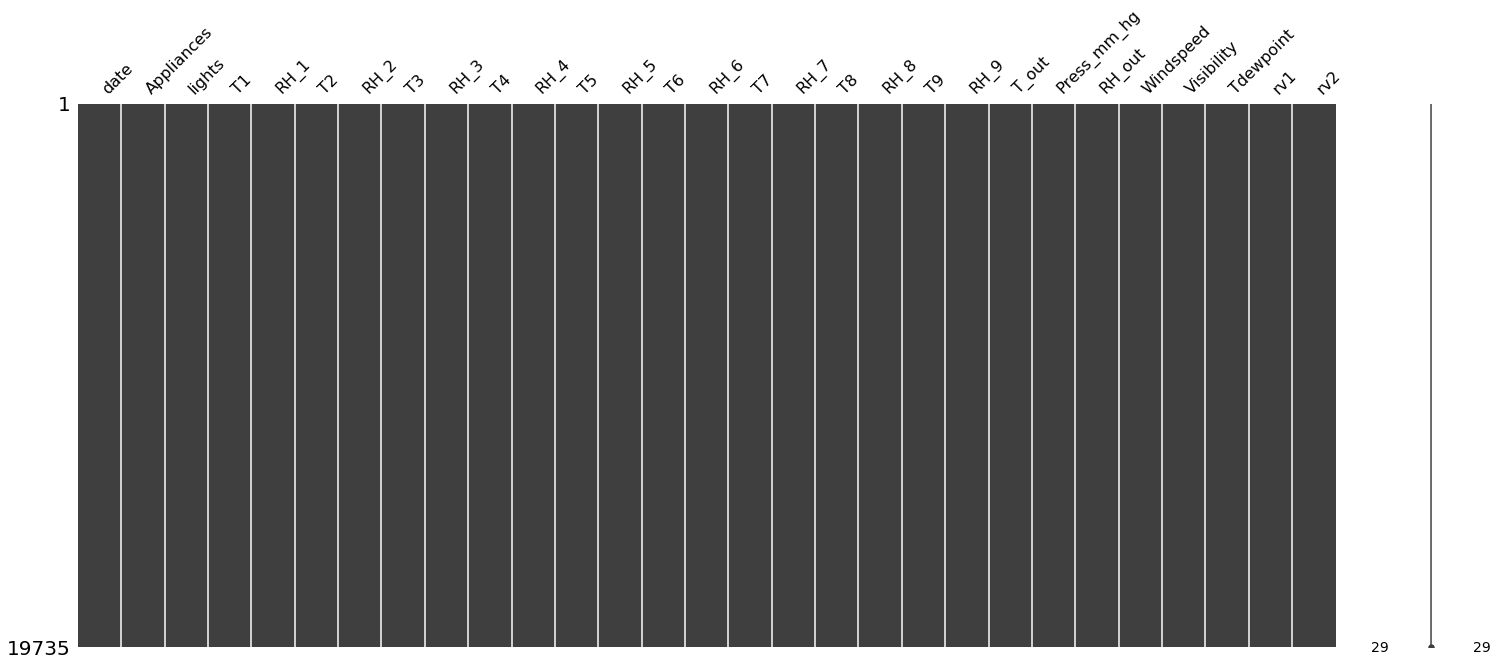

In [12]:
# A graphical view/representation of columns(features) with missing data using missingno
# Missingno library offers a very nice way to visualize the distribution of NaN values.
import missingno as msno
msno.matrix(dataset)
plt.show()

# the bars with fuller gray colors shows no missing value, while the ones with white marks shows the presence of missing values.

As shown above, there seems to be no missing values in the dataset

### Check for General Correlation of Features

In [13]:
pearson_corr = dataset.corr(method='pearson')
pearson_corr

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights         0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1             0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1           0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2             0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2          -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3             0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3           0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4             0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4           0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5             0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5           0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6             0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6          -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7             0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7          -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8             0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8          -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9             0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9          -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out          0.099155 -0.074424  0.682846  0.340767  0.792255  0.033674   
Press_mm_hg   -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out        -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed      0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility     0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint      0.015353 -0.036322  0.571309  0.639106  0.582602  0.499152   
rv1           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
rv2           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   

                   T3      RH_3        T4      RH_4  ...        T9      RH_9  \
Appliances   0.085060  0.036292  0.040281  0.016965  ...  0.010010 -0.051462   
lights      -0.097393  0.131161 -0.008859  0.114936  ... -0.157592 -0.008766   
T1           0.892402 -0.028550  0.877001  0.097861  ...  0.844777  0.071756   
RH_1         0.253230  0.844677  0.106180  0.880359  ...  0.115263  0.764001   
T2           0.735245  0.121497  0.762066  0.231563  ...  0.675535  0.157346   
RH_2         0.137319  0.678326 -0.047304  0.721435  ...  0.054544  0.676467   
T3           1.000000 -0.011234  0.852778  0.122737  ...  0.901324  0.134602   
RH_3        -0.011234  1.000000 -0.140457  0.898978  ... -0.195270  0.833538   
T4           0.852778 -0.140457  1.000000 -0.048650  ...  0.889439 -0.025549   
RH_4         0.122737  0.898978 -0.048650  1.000000  ... -0.044518  0.856591   
T5           0.888169 -0.050062  0.871813  0.091812  ...  0.911055  0.072308   
RH_5        -0.066355  0.375422 -0.076489  0.352591  ... -0.138509  0.272197   
T6           0.686882  0.076833  0.652350  0.259047  ...  0.667177  0.184424   
RH_6        -0.647672  0.514912 -0.703149  0.392178  ... -0.738940  0.391943   
T7           0.847374 -0.250090  0.877763 -0.131204  ...  0.944776 -0.077690   
RH_7         0.172624  0.832685  0.043527  0.894301  ...  0.028055  0.858686   
T8           0.795283 -0.283228  0.796256 -0.167066  ...  0.869338 -0.156820   
RH_8         0.044427  0.828822 -0.095192  0.847259  ... -0.113014  0.855812   
T9           0.901324 -0.195270  0.889439 -0.044518  ...  1.000000 -0.008683   
RH_9         0.134602  0.833538 -0.025549  0.856591  ... -0.008683  1.000000   
T_out        0.699417  0.118207  0.663478  0.293289  ...  0.668220  0.223270   
Press_mm_hg -0.1899

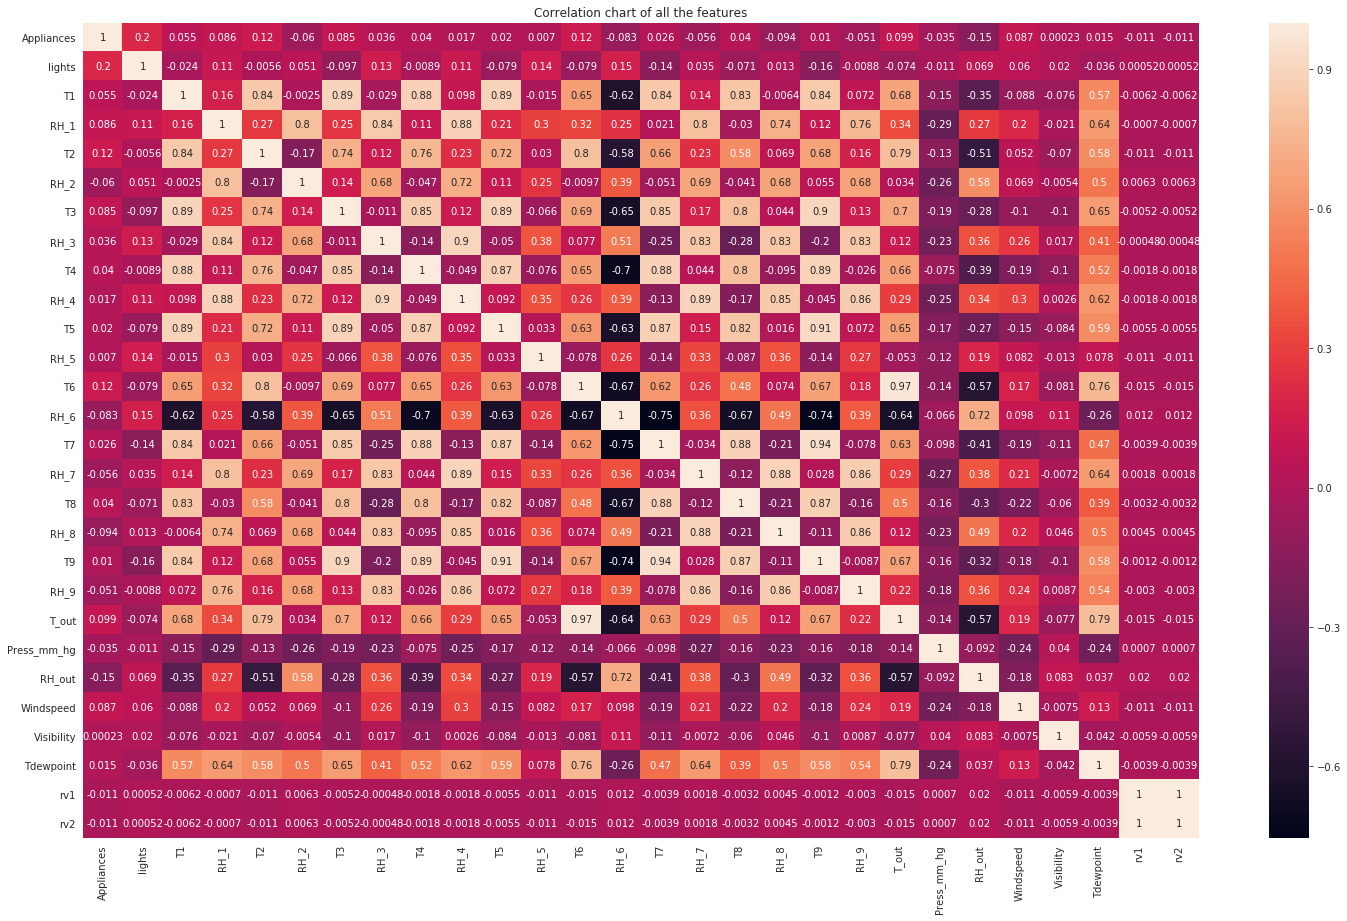

In [14]:
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(dataset.corr(), annot=True)
    plt.title('Correlation chart of all the features')

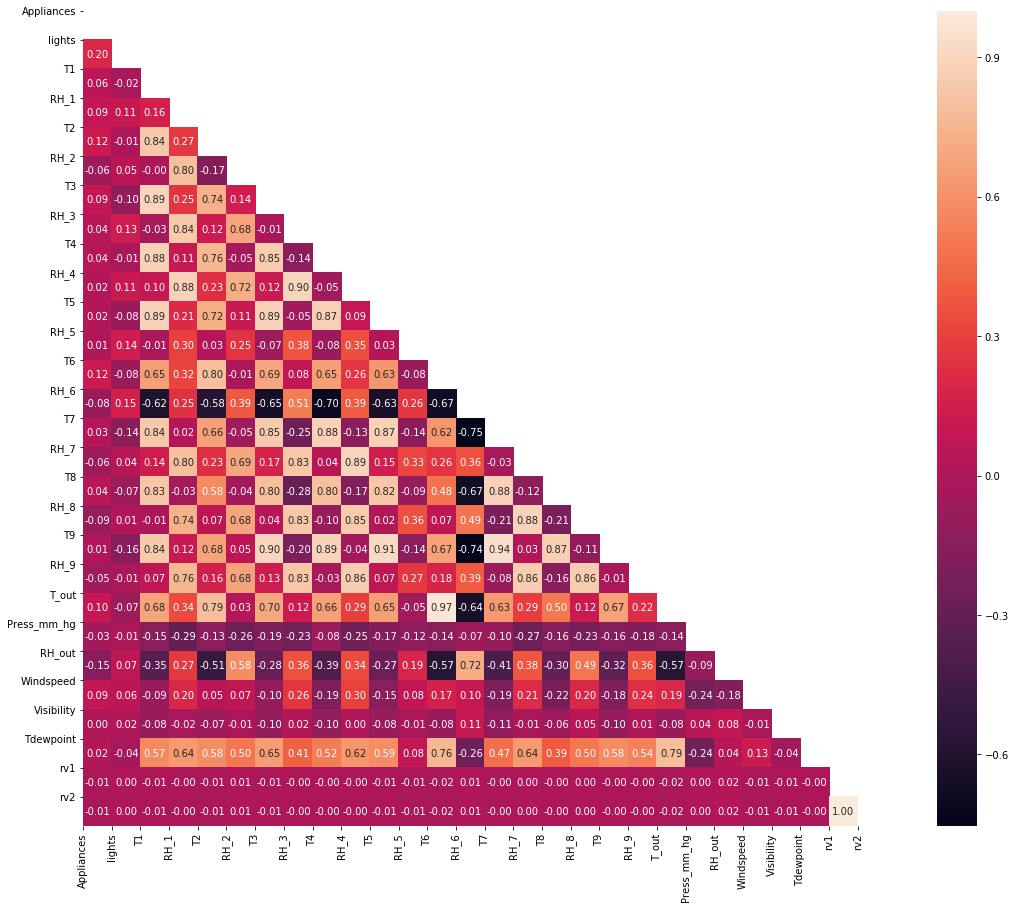

In [15]:
dataset_corr = dataset.corr()

# Mask the repeated values
mask = np.zeros_like(dataset_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(18, 15))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(dataset_corr, annot=True, fmt=".2f" , mask=mask,)

    #Apply xticks
plt.xticks(range(len(dataset_corr.columns)), dataset_corr.columns);

    #Apply yticks
plt.yticks(range(len(dataset_corr.columns)), dataset_corr.columns)

    #show plot
plt.show()

In [16]:
# Divide the columns based on type for clear column management 

# columns for temperature
column_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

# columns for humidity
column_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

# columns for weather
column_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"]

# columns for lights
column_light = ["lights"]

# columns for random variables
column_randoms = ["rv1", "rv2"]

# columns for appliances
column_target = ["Appliances"]

## Explorarory Data Analysis of the Features

### Temperature Features

####  describe() method shows a summary of the numerical attributes

 - The `count`, `mean`, `min`, and `max` rows are self-explanatory.
 
 - The `std` row shows the `standard deviation`, which `measures how dispersed` the values are.
 
 - The `25%`, `50%`, and `75%` rows show the `corresponding percentiles`: a `percentile` indicates the value below which a given percentage of observations in a group of observations fall. These are often called the `25th percentile` (or first quartile), the `median`, and the `75th percentile`(or third quartile). 

In [17]:
corr_temp = dataset[column_temp]

corr_temp.describe().T

count       mean       std        min        25%        50%        75%  \
T1  19735.0  21.686571  1.606066  16.790000  20.760000  21.600000  22.600000   
T2  19735.0  20.341219  2.192974  16.100000  18.790000  20.000000  21.500000   
T3  19735.0  22.267611  2.006111  17.200000  20.790000  22.100000  23.290000   
T4  19735.0  20.855335  2.042884  15.100000  19.530000  20.666667  22.100000   
T5  19735.0  19.592106  1.844623  15.330000  18.277500  19.390000  20.619643   
T6  19735.0   7.910939  6.090347  -6.065000   3.626667   7.300000  11.256000   
T7  19735.0  20.267106  2.109993  15.390000  18.700000  20.033333  21.600000   
T8  19735.0  22.029107  1.956162  16.306667  20.790000  22.100000  23.390000   
T9  19735.0  19.485828  2.014712  14.890000  18.000000  19.390000  20.600000   

          max  
T1  26.260000  
T2  29.856667  
T3  29.236000  
T4  26.200000  
T5  25.795000  
T6  28.290000  
T7  26.000000  
T8  27.230000  
T9  24.500000

In [18]:
corr_temp.mode()

T1    T2     T3     T4    T5   T6    T7     T8    T9
0  21.0  19.2  22.39  20.39  18.6  6.4  18.5  22.79  20.5

#### Observations

- `Temperature columns` - Temperature inside the house (`T1`, `T2`, `T3`, `T4`, `T5`, `T7`, `T8`, `T9`) varies between `14.89 Deg` & `29.85 Deg`, temperatire outside (`T6`) varies between `-6.06 Deg` to `28.29 Deg`. The reason for this variation is `sensors` are kept outside the house.

In [19]:
# Pearson correlation table
pearson_corr = corr_temp.corr(method='pearson')
pearson_corr

T1        T2        T3        T4        T5        T6        T7  \
T1  1.000000  0.836834  0.892402  0.877001  0.885247  0.654769  0.838705   
T2  0.836834  1.000000  0.735245  0.762066  0.720550  0.801186  0.663660   
T3  0.892402  0.735245  1.000000  0.852778  0.888169  0.686882  0.847374   
T4  0.877001  0.762066  0.852778  1.000000  0.871813  0.652350  0.877763   
T5  0.885247  0.720550  0.888169  0.871813  1.000000  0.629161  0.870624   
T6  0.654769  0.801186  0.686882  0.652350  0.629161  1.000000  0.619085   
T7  0.838705  0.663660  0.847374  0.877763  0.870624  0.619085  1.000000   
T8  0.825413  0.578191  0.795283  0.796256  0.824981  0.482836  0.882123   
T9  0.844777  0.675535  0.901324  0.889439  0.911055  0.667177  0.944776   

          T8        T9  
T1  0.825413  0.844777  
T2  0.578191  0.675535  
T3  0.795283  0.901324  
T4  0.796256  0.889439  
T5  0.824981  0.911055  
T6  0.482836  0.667177  
T7  0.882123  0.944776  
T8  1.000000  0.869338  
T9  0.869338  1.000000

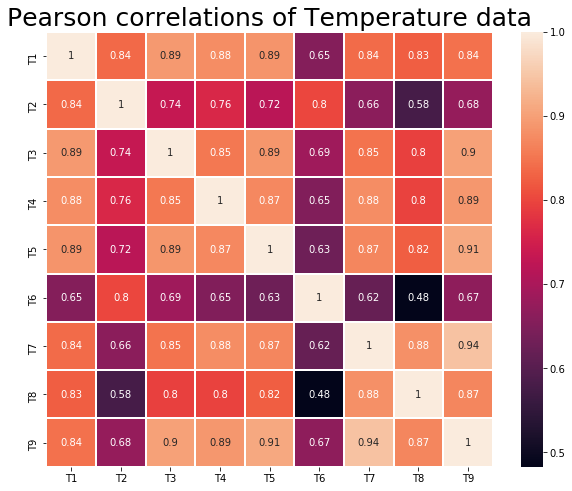

In [20]:
plt.figure(figsize = (10, 8))

# Pearson correlation graph for the Temperature features
sns.heatmap(pearson_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Pearson correlations of Temperature data', fontsize=25)

plt.show()

In [21]:
# Skewness
corr_temp.skew()

T1    0.120917
T2    0.889658
T3    0.450777
T4    0.170384
T5    0.558220
T6    0.597471
T7    0.254722
T8   -0.256151
T9    0.382711
dtype: float64

#### Inference from our dataset based on its Skewness 

- the **`Temperature Features`** graphs symmetrically, the `distribution has zero skewness`, and they are all normally distributed 

- the **`Temperature feature`**  satisfies the `Normality: the residuals are of a normal distribution` Assumption for Linear Regression

### Kurtosis 

This provides information for the `degree of peakedness` of a `data distribution`. `Peakedness` in a `data distribution` is the `degree` to which data values are `concentrated` around the `mean`.

In [22]:
# Kurtosis
corr_temp.kurtosis()

T1    0.161601
T2    0.933397
T3   -0.007055
T4   -0.037633
T5    0.112724
T6    0.425549
T7   -0.461165
T8   -0.158742
T9   -0.324625
dtype: float64

#### Understand the distribution of the Temperature features data

Another quick way to get a feel of the `type of data` you are dealing with is to `plot` a `histogram` for each `numerical attribute`. A `histogram` shows the number of instances (on the `vertical axis`) that have a given value range (on the horizontal axis).

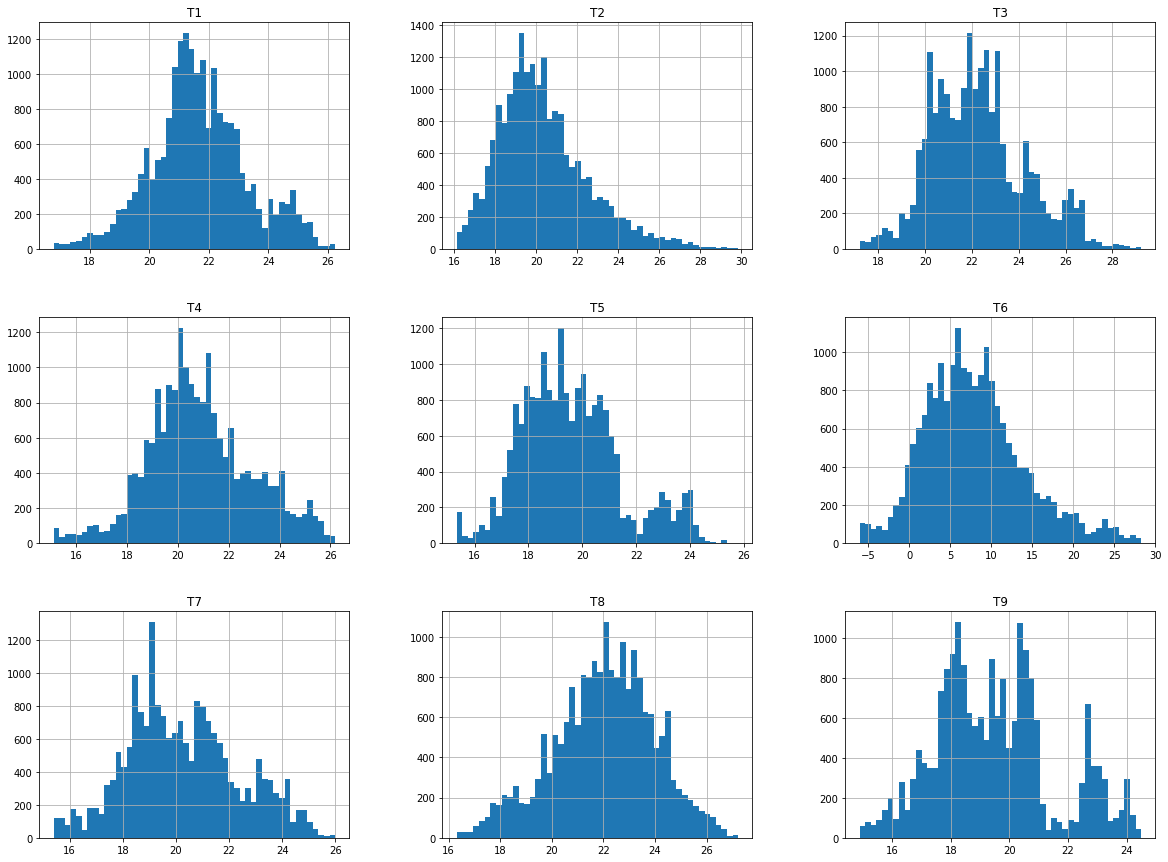

In [23]:
# Data distribution
corr_temp.hist(bins=50, figsize=(20,15))
plt.show()

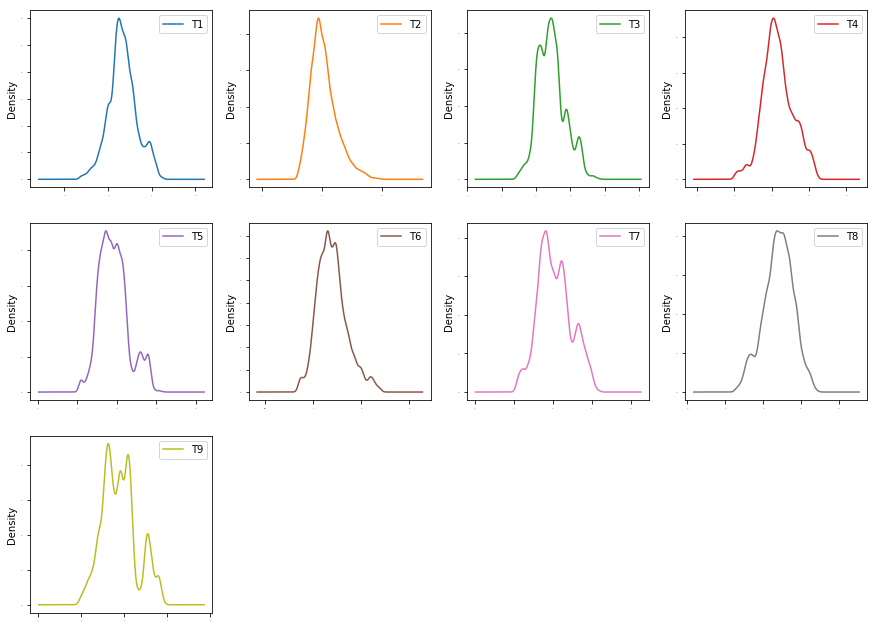

In [24]:
# density plot
corr_temp.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1, figsize=(15,15))
pyplot.show()

### Check for Outliers in the Temperature Features

Interval of values not considered `Outliers`

- `[Q1 – 1.5 (IQR) , Q3 + 1.5 (IQR) ]` (i.e. IQR = Q3 - Q1)

- Values not lying within this interval are considered outliers. Knowing the values of `Q1` and `Q3` is fundamental for this calculation to take place.

#### Methods for removing Outliers

- `Remove the outliers:` This is only possible when the proportion of outliers to meaningful values is quite low, and the data values are not on a time series scale. If the proportion of outliers is high, then removing these values will hurt the richness of data, and models applied won’t be able to capture the true essence that lies within.
However, in case the data is of a time series nature, removing outliers from the data won’t be feasible, the reason being that for a time series model to train effectively, data should be continuous with respect to time. Removing outliers in this case will introduce breaks within the continuous distribution.

- `Replace outliers with means:` Another way to approach this is by taking the `mean of values` lying with the interval. calculate the mean, and use these to replace the `outliers`. This will successfully transform the outliers in line with
the valid observations; however, this will remove the `anomalies` that were otherwise present in the dataset, and their findings could present interesting insights.

- `Transform the outlier values:` Another way to cop up with outliers is to limit them to the `upper` and `lower` boundaries of acceptable data. The `upper boundary` can be calculated by plugging in the values of `Q3` and `IQR` into `Q3 + 1.5IQR` and the `lower boundary` can be calculated by plugging in the values of `Q1` and `IQR` into `Q1 – 1.5IQR`.

- `Variable transformation:` `Transformations` are used to convert the `inherited distribution` into a `normal distribution`. Outliers bring `non-normality` to the data and thus transforming the variable can reduce the `influence of outliers`. Methodologies of transformation include, but are not limited to, `natural log`, `conversion of data into ratio variables`, and so on.


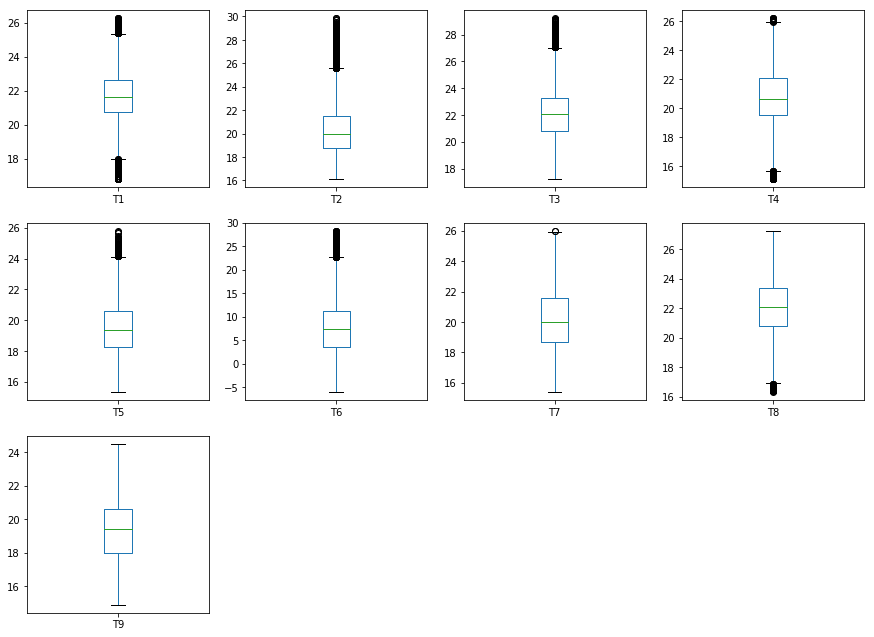

In [25]:
# box and whisker plots

corr_temp.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
pyplot.show()


### How the temperature features are distributed amongst themselves

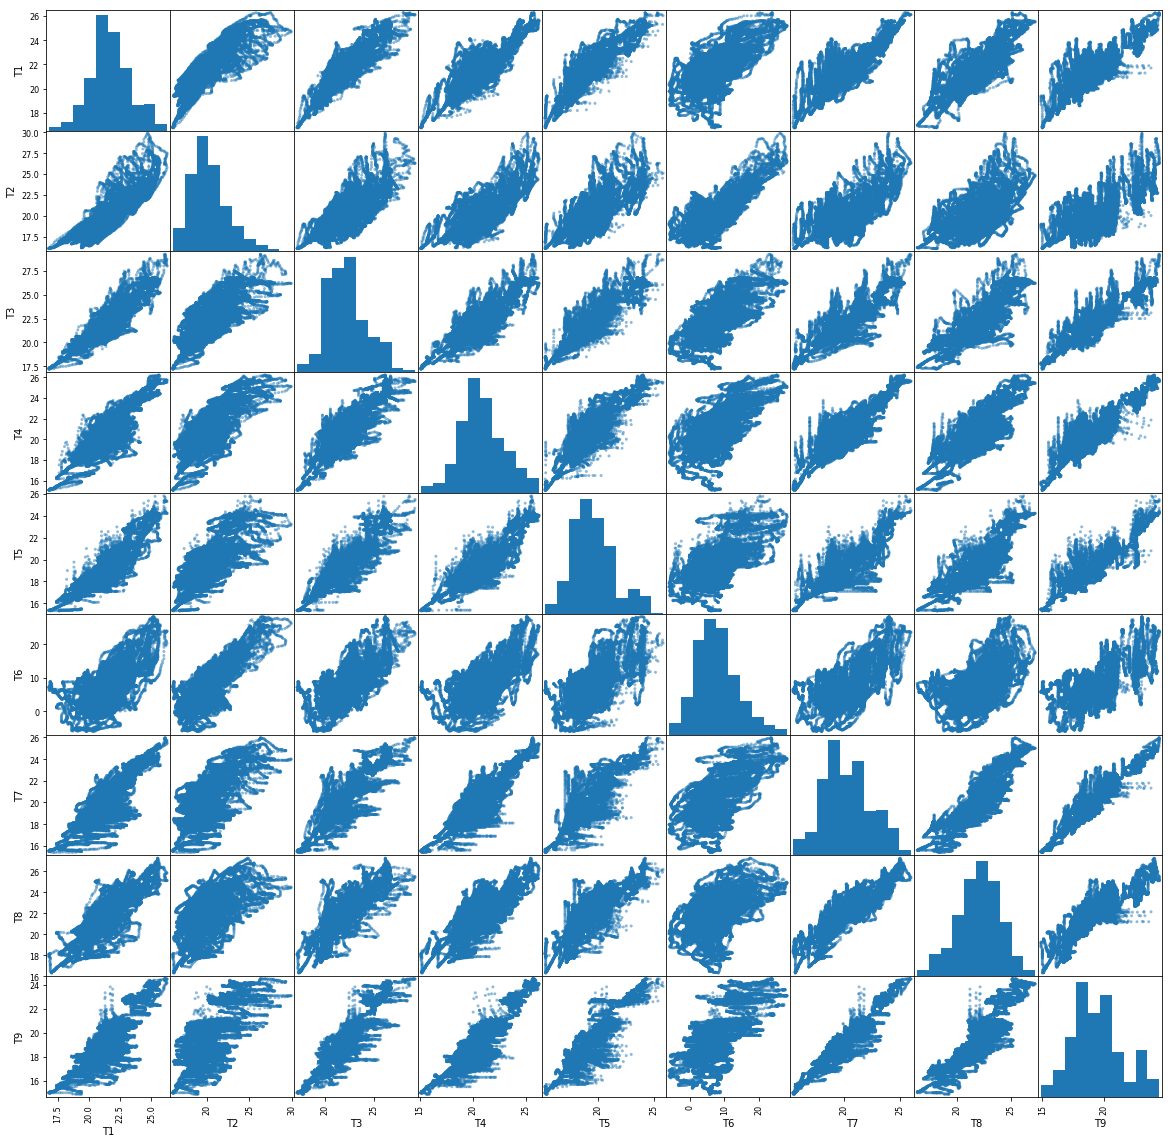

In [26]:
# scatter plot matrix
# corr_temp = dataset[['']]

from pandas.plotting import scatter_matrix
scatter_matrix(corr_temp, figsize=(20, 20))
pyplot.show()

In [27]:
corr_temp['Appliances'] = dataset[column_target]
corr_temp

T1         T2         T3         T4         T5         T6  \
0      19.890000  19.200000  19.790000  19.000000  17.166667   7.026667   
1      19.890000  19.200000  19.790000  19.000000  17.166667   6.833333   
2      19.890000  19.200000  19.790000  18.926667  17.166667   6.560000   
3      19.890000  19.200000  19.790000  18.890000  17.166667   6.433333   
4      19.890000  19.200000  19.790000  18.890000  17.200000   6.366667   
...          ...        ...        ...        ...        ...        ...   
19730  25.566667  25.890000  27.200000  24.700000  23.200000  24.796667   
19731  25.500000  25.754000  27.133333  24.700000  23.230000  24.196667   
19732  25.500000  25.628571  27.050000  24.700000  23.230000  23.626667   
19733  25.500000  25.414000  26.890000  24.700000  23.200000  22.433333   
19734  25.500000  25.264286  26.823333  24.700000  23.200000  21.026667   

              T7       T8         T9  Appliances  
0      17.200000  18.2000  17.033333          60  
1      17.200000  18.2000  17.066667          60  
2      17.200000  18.2000  17.000000          50  
3      17.133333  18.1000  17.000000          50  
4      17.200000  18.1000  17.000000          60  
...          ...      ...        ...         ...  
19730  24.500000  24.7000  23.200000         100  
19731  24.557143  24.7000  23.200000          90  
19732  24.540000  24.7000  23.200000         270  
19733  24.500000  24.6625  23.200000         420  
19734  24.500000  24.7360  23.200000         430  

[19735 rows x 10 columns]

### Scatter plot matrix of how the temperature features aganist the target variable (Appliances)

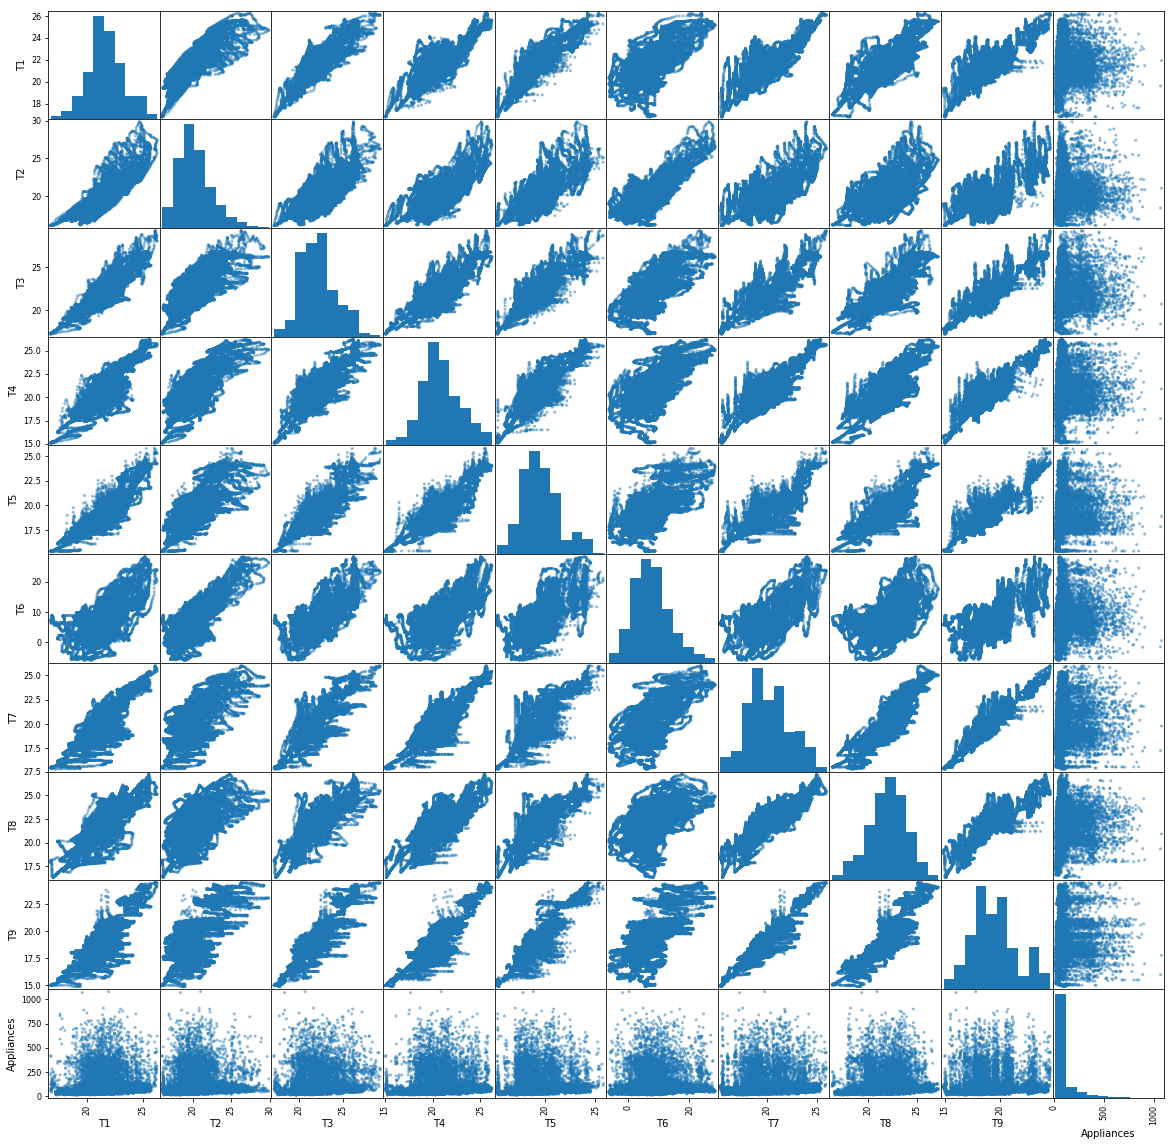

In [28]:
# scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(corr_temp, figsize=(20, 20))
pyplot.show()

### Humidity Features

In [29]:
corr_hum = dataset[column_hum]

corr_hum.describe().T

count       mean        std        min        25%        50%  \
RH_1  19735.0  40.259739   3.979299  27.023333  37.333333  39.656667   
RH_2  19735.0  40.420420   4.069813  20.463333  37.900000  40.500000   
RH_3  19735.0  39.242500   3.254576  28.766667  36.900000  38.530000   
RH_4  19735.0  39.026904   4.341321  27.660000  35.530000  38.400000   
RH_5  19735.0  50.949283   9.022034  29.815000  45.400000  49.090000   
RH_6  19735.0  54.609083  31.149806   1.000000  30.025000  55.290000   
RH_7  19735.0  35.388200   5.114208  23.200000  31.500000  34.863333   
RH_8  19735.0  42.936165   5.224361  29.600000  39.066667  42.375000   
RH_9  19735.0  41.552401   4.151497  29.166667  38.500000  40.900000   

            75%        max  
RH_1  43.066667  63.360000  
RH_2  43.260000  56.026667  
RH_3  41.760000  50.163333  
RH_4  42.156667  51.090000  
RH_5  53.663333  96.321667  
RH_6  83.226667  99.900000  
RH_7  39.000000  51.400000  
RH_8  46.536000  58.780000  
RH_9  44.338095  53.326667

In [30]:
corr_hum.mode()

RH_1  RH_2   RH_3   RH_4  RH_5  RH_6  RH_7  RH_8  RH_9
0  39.09  40.0  37.59  38.59  49.0   1.0  33.9  39.5  39.2

In [31]:
# Pearson correlation table
pearson_corr_hum = corr_hum.corr(method='pearson')
pearson_corr_hum

RH_1      RH_2      RH_3      RH_4      RH_5      RH_6      RH_7  \
RH_1  1.000000  0.797535  0.844677  0.880359  0.303258  0.245126  0.801122   
RH_2  0.797535  1.000000  0.678326  0.721435  0.250271  0.389933  0.690584   
RH_3  0.844677  0.678326  1.000000  0.898978  0.375422  0.514912  0.832685   
RH_4  0.880359  0.721435  0.898978  1.000000  0.352591  0.392178  0.894301   
RH_5  0.303258  0.250271  0.375422  0.352591  1.000000  0.263797  0.325808   
RH_6  0.245126  0.389933  0.514912  0.392178  0.263797  1.000000  0.357222   
RH_7  0.801122  0.690584  0.832685  0.894301  0.325808  0.357222  1.000000   
RH_8  0.736196  0.679777  0.828822  0.847259  0.359840  0.489580  0.883984   
RH_9  0.764001  0.676467  0.833538  0.856591  0.272197  0.391943  0.858686   

          RH_8      RH_9  
RH_1  0.736196  0.764001  
RH_2  0.679777  0.676467  
RH_3  0.828822  0.833538  
RH_4  0.847259  0.856591  
RH_5  0.359840  0.272197  
RH_6  0.489580  0.391943  
RH_7  0.883984  0.858686  
RH_8  1.000000  0.855812  
RH_9  0.855812  1.000000

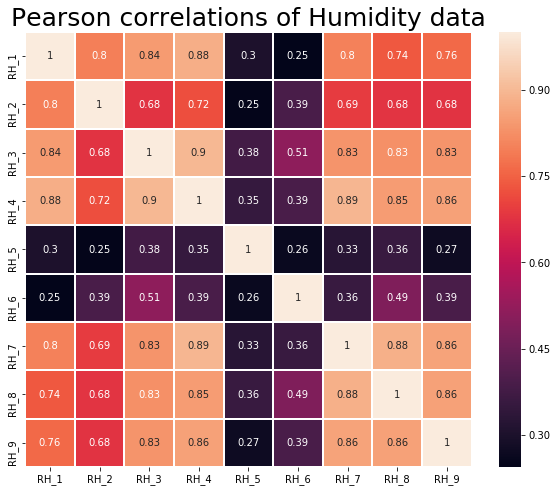

In [32]:
plt.figure(figsize = (10, 8))

# Pearson correlation graph for the Temperature features
sns.heatmap(pearson_corr_hum, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Pearson correlations of Humidity data', fontsize=25)

plt.show()

In [33]:
# Skewness
corr_hum.skew()

RH_1    0.465774
RH_2   -0.268247
RH_3    0.467589
RH_4    0.444614
RH_5    1.866820
RH_6   -0.241961
RH_7    0.242141
RH_8    0.308036
RH_9    0.368937
dtype: float64

In [34]:
# Kurtosis
corr_hum.kurtosis()

RH_1    0.112629
RH_2    0.670959
RH_3   -0.583126
RH_4   -0.613967
RH_5    4.503391
RH_6   -1.142064
RH_7   -0.544889
RH_8   -0.481962
RH_9   -0.405540
dtype: float64

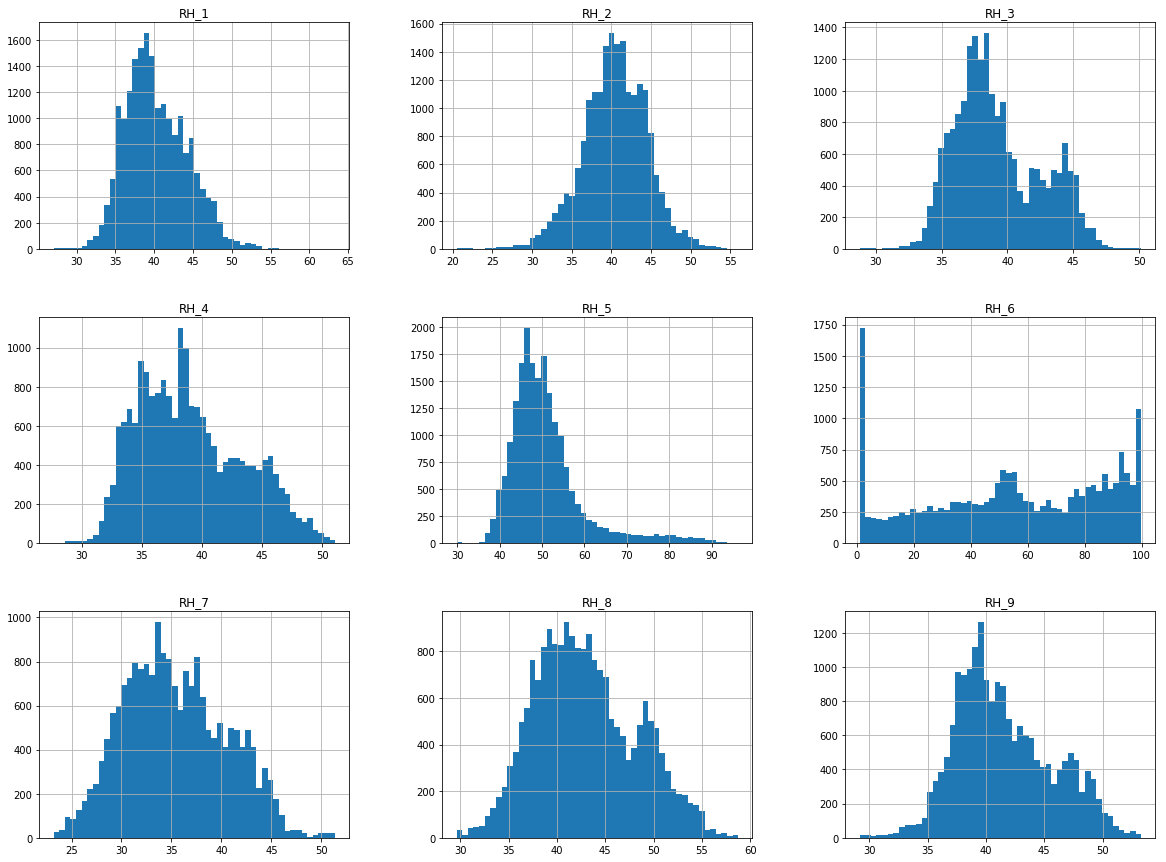

In [35]:
# Data distribution
corr_hum.hist(bins=50, figsize=(20,15))
plt.show()

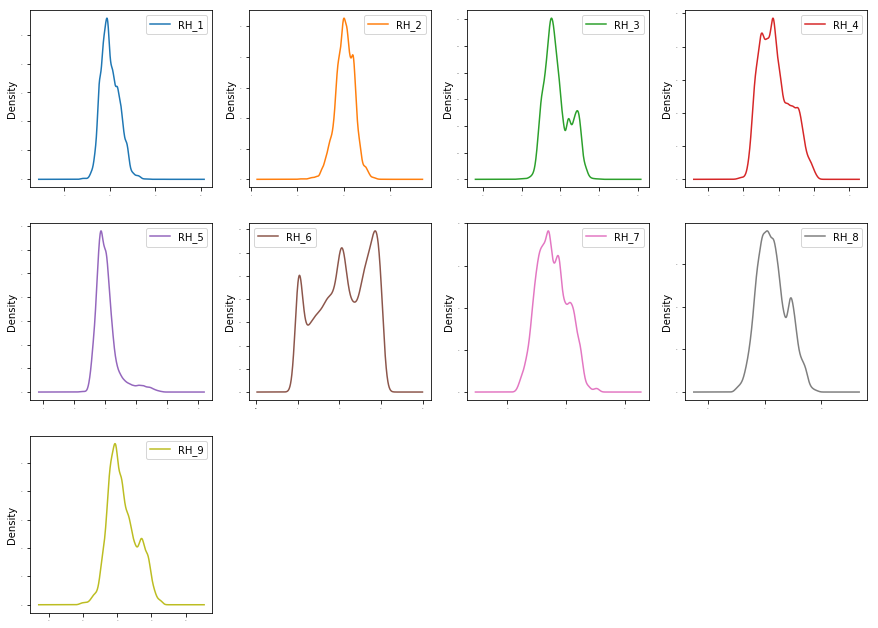

In [36]:
# density plot
corr_hum.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1, figsize=(15,15))
pyplot.show()

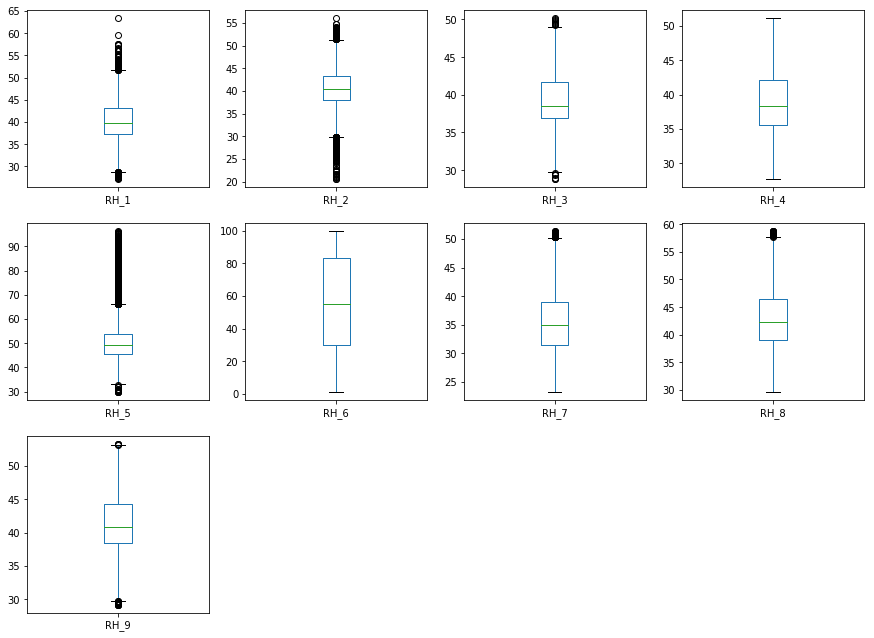

In [37]:
# box and whisker plots

corr_hum.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
pyplot.show()

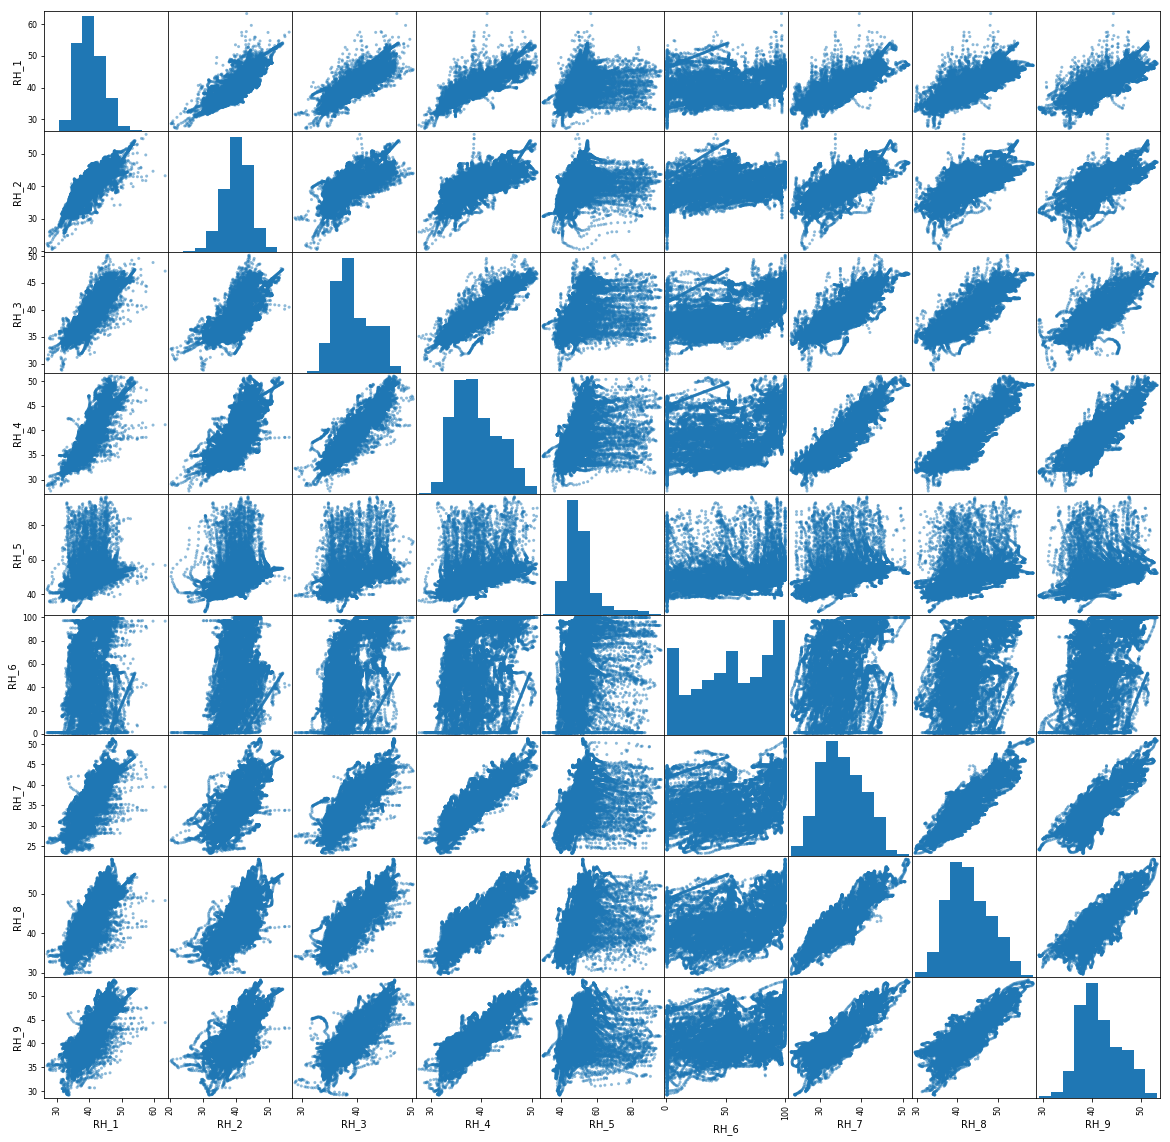

In [38]:
# scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(corr_hum, figsize=(20, 20))
pyplot.show()

In [39]:
corr_hum['Appliances'] = dataset[column_target]
corr_hum

RH_1       RH_2       RH_3       RH_4       RH_5       RH_6  \
0      47.596667  44.790000  44.730000  45.566667  55.200000  84.256667   
1      46.693333  44.722500  44.790000  45.992500  55.200000  84.063333   
2      46.300000  44.626667  44.933333  45.890000  55.090000  83.156667   
3      46.066667  44.590000  45.000000  45.723333  55.090000  83.423333   
4      46.333333  44.530000  45.000000  45.530000  55.090000  84.893333   
...          ...        ...        ...        ...        ...        ...   
19730  46.560000  42.025714  41.163333  45.590000  52.400000   1.000000   
19731  46.500000  42.080000  41.223333  45.590000  52.326667   1.000000   
19732  46.596667  42.768571  41.690000  45.730000  52.266667   1.000000   
19733  46.990000  43.036000  41.290000  45.790000  52.200000   1.000000   
19734  46.600000  42.971429  41.156667  45.963333  52.200000   1.000000   

            RH_7       RH_8     RH_9  Appliances  
0      41.626667  48.900000  45.5300          60  
1      41.560000  48.863333  45.5600          60  
2      41.433333  48.730000  45.5000          50  
3      41.290000  48.590000  45.4000          50  
4      41.230000  48.590000  45.4000          60  
...          ...        ...      ...         ...  
19730  44.500000  50.074000  46.7900         100  
19731  44.414286  49.790000  46.7900          90  
19732  44.400000  49.660000  46.7900         270  
19733  44.295714  49.518750  46.8175         420  
19734  44.054000  49.736000  46.8450         430  

[19735 rows x 10 columns]

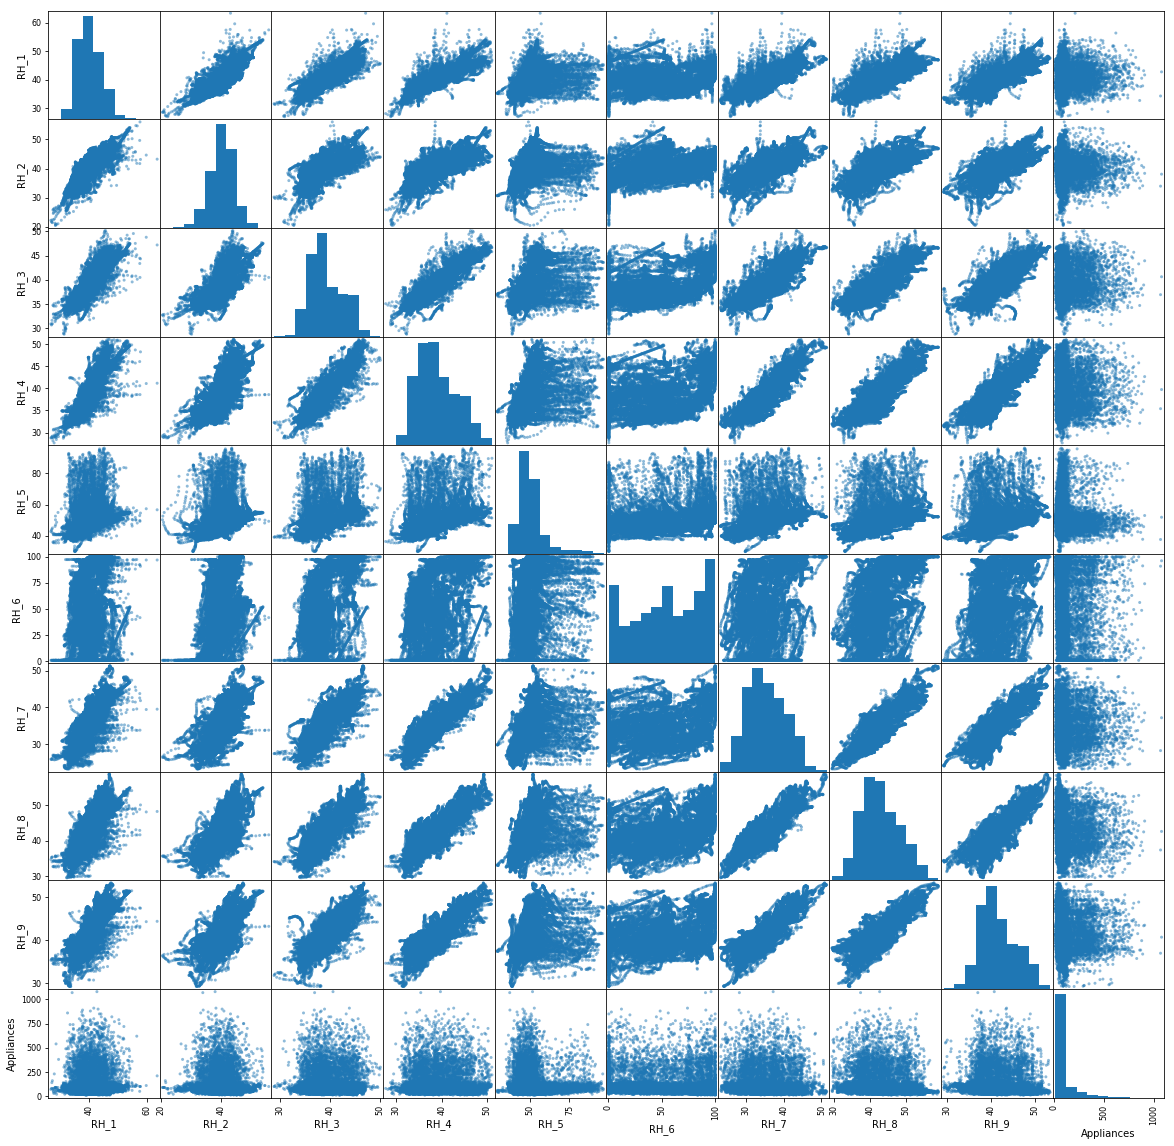

In [40]:
# scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(corr_hum, figsize=(20, 20))
pyplot.show()

### Weather Data

In [41]:
corr_wea = dataset[column_weather]

corr_wea.describe().T

count        mean        std    min         25%         50%  \
T_out        19735.0    7.411665   5.317409   -5.0    3.666667    6.916667   
Tdewpoint    19735.0    3.760707   4.194648   -6.6    0.900000    3.433333   
RH_out       19735.0   79.750418  14.901088   24.0   70.333333   83.666667   
Press_mm_hg  19735.0  755.522602   7.399441  729.3  750.933333  756.100000   
Windspeed    19735.0    4.039752   2.451221    0.0    2.000000    3.666667   
Visibility   19735.0   38.330834  11.794719    1.0   29.000000   40.000000   

                    75%    max  
T_out         10.408333   26.1  
Tdewpoint      6.566667   15.5  
RH_out        91.666667  100.0  
Press_mm_hg  760.933333  772.3  
Windspeed      5.500000   14.0  
Visibility    40.000000   66.0

In [42]:
corr_wea.mode()

T_out  Tdewpoint  RH_out  Press_mm_hg  Windspeed  Visibility
0    9.8        0.0    95.0        757.3        1.0        40.0

In [43]:
# Pearson correlation table
pearson_corr_wea = corr_wea.corr(method='pearson')
pearson_corr_wea

T_out  Tdewpoint    RH_out  Press_mm_hg  Windspeed  Visibility
T_out        1.000000   0.790661 -0.574197    -0.143249   0.192936   -0.077367
Tdewpoint    0.790661   1.000000  0.036506    -0.244098   0.125972   -0.042190
RH_out      -0.574197   0.036506  1.000000    -0.092017  -0.176458    0.083125
Press_mm_hg -0.143249  -0.244098 -0.092017     1.000000  -0.235032    0.040315
Windspeed    0.192936   0.125972 -0.176458    -0.235032   1.000000   -0.007516
Visibility  -0.077367  -0.042190  0.083125     0.040315  -0.007516    1.000000

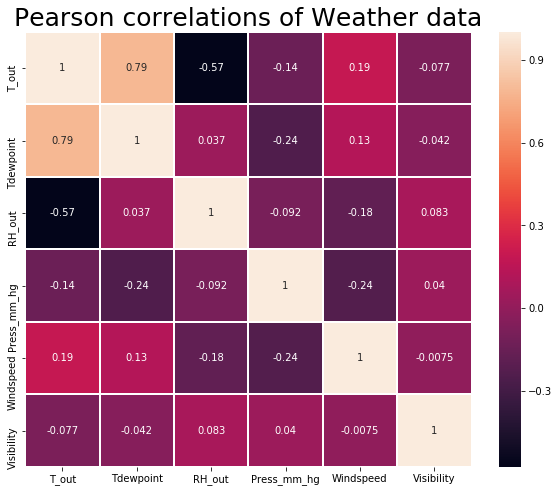

In [44]:
plt.figure(figsize = (10, 8))

# Pearson correlation graph for the Temperature features
sns.heatmap(pearson_corr_wea, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Pearson correlations of Weather data', fontsize=25)

plt.show()

In [45]:
# Skewness
corr_wea.skew()

T_out          0.534273
Tdewpoint      0.239374
RH_out        -0.922997
Press_mm_hg   -0.420442
Windspeed      0.859982
Visibility     0.441554
dtype: float64

In [46]:
# Kurtosis
corr_wea.kurtosis()

T_out          0.364291
Tdewpoint     -0.124519
RH_out         0.256859
Press_mm_hg    0.071831
Windspeed      0.250030
Visibility     0.165818
dtype: float64

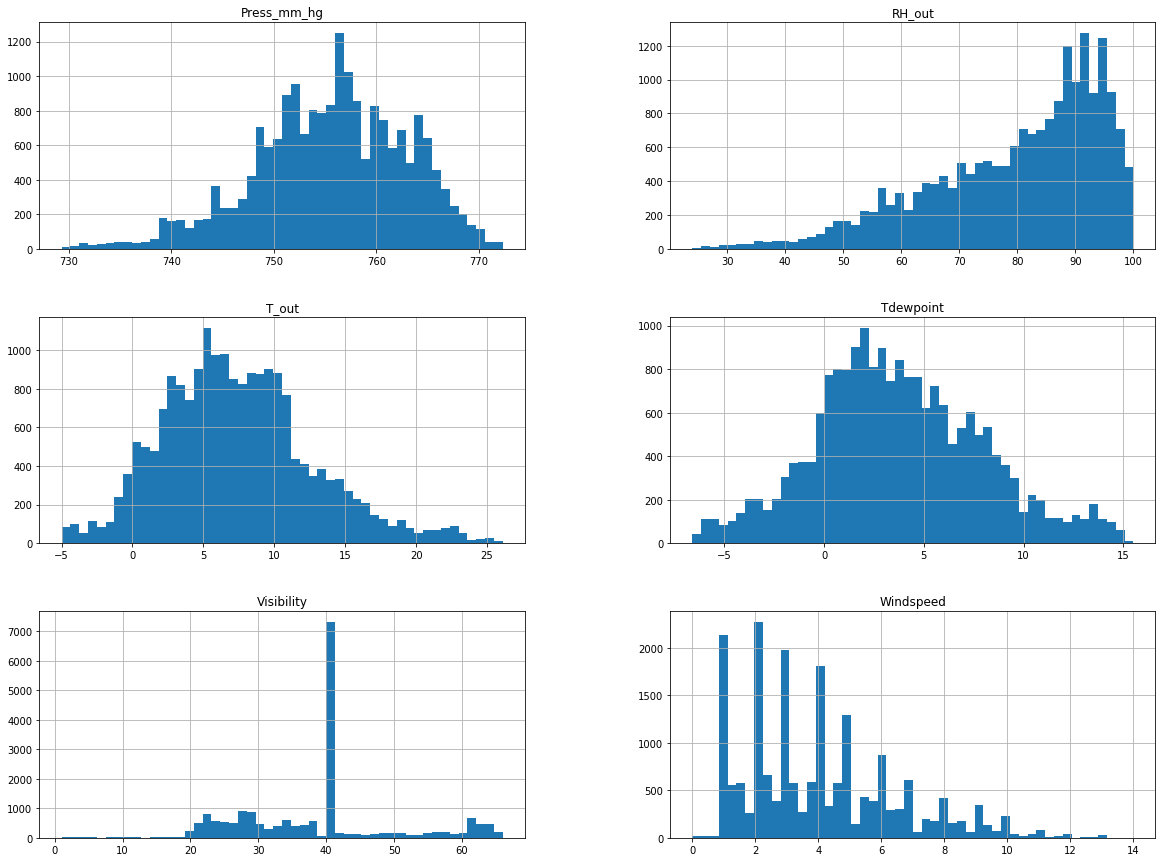

In [47]:
# Data distribution
corr_wea.hist(bins=50, figsize=(20,15))
plt.show()

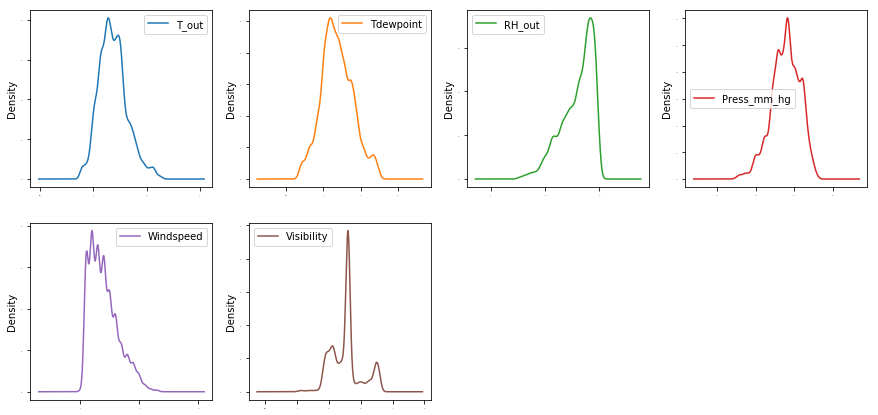

In [48]:
# density plot
corr_wea.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1, figsize=(15,15))
pyplot.show()

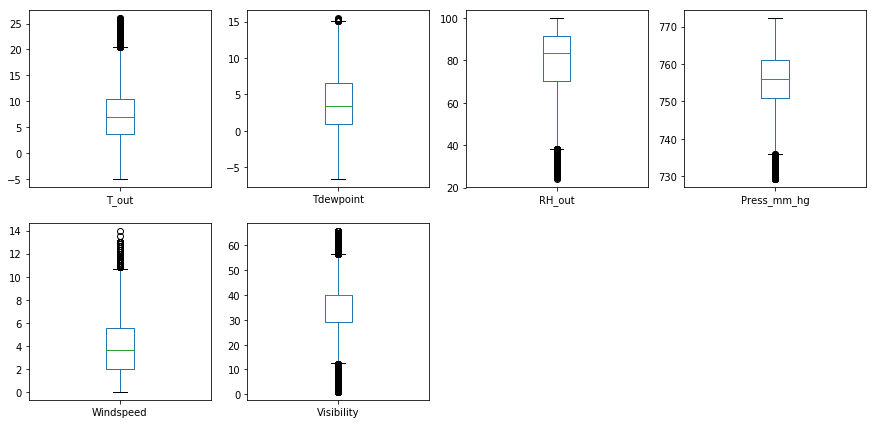

In [49]:
# box and whisker plots

corr_wea.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
pyplot.show()

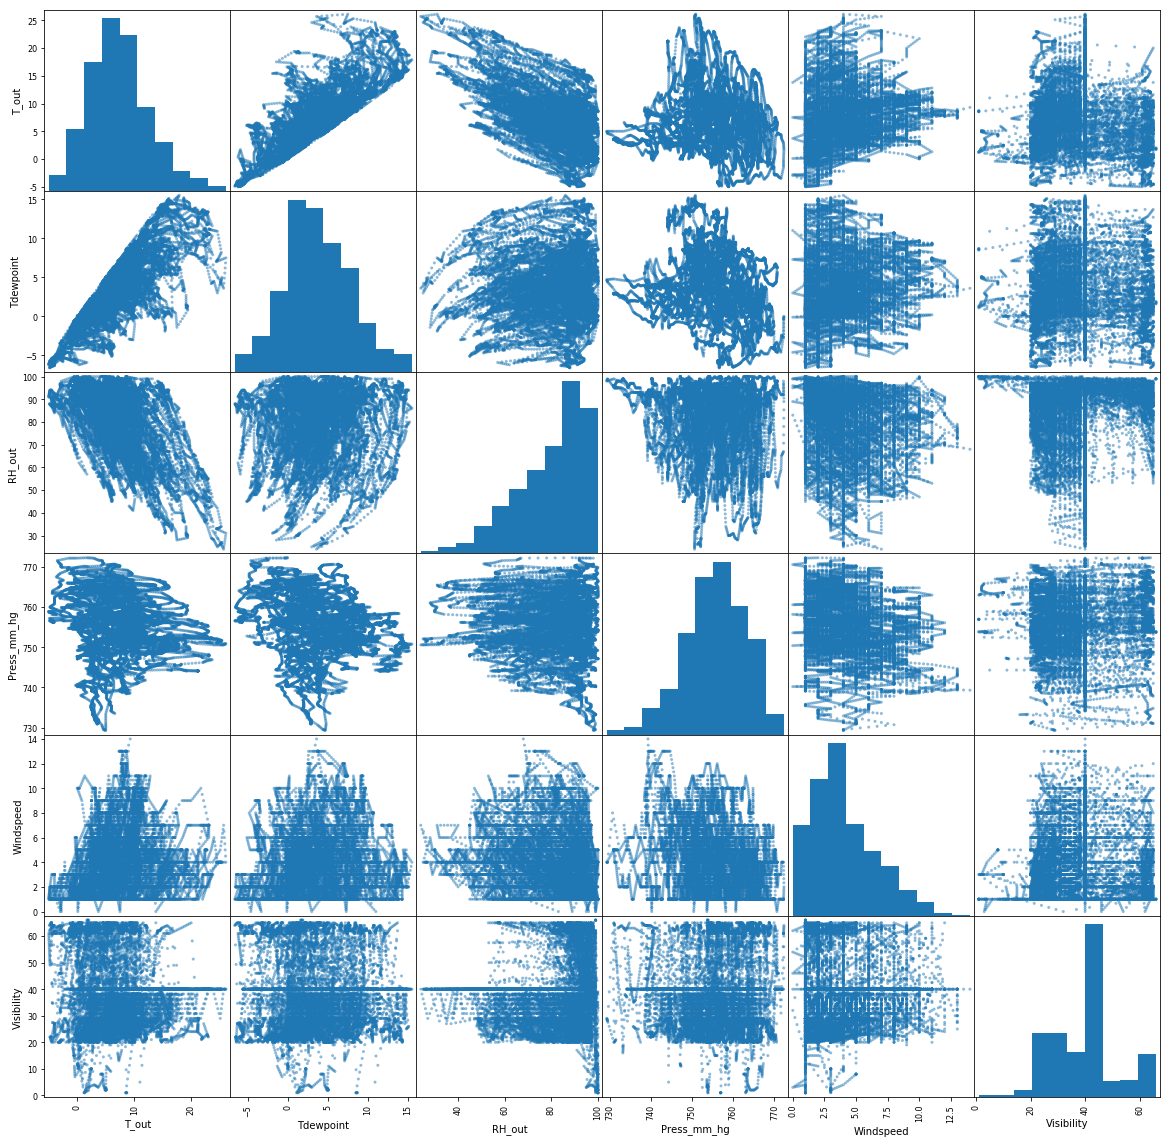

In [50]:
# scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(corr_wea, figsize=(20, 20))
pyplot.show()

In [51]:
corr_wea['Appliances'] = dataset[column_target]
corr_wea

T_out  Tdewpoint     RH_out  Press_mm_hg  Windspeed  Visibility  \
0       6.600000   5.300000  92.000000        733.5   7.000000   63.000000   
1       6.483333   5.200000  92.000000        733.6   6.666667   59.166667   
2       6.366667   5.100000  92.000000        733.7   6.333333   55.333333   
3       6.250000   5.000000  92.000000        733.8   6.000000   51.500000   
4       6.133333   4.900000  92.000000        733.9   5.666667   47.666667   
...          ...        ...        ...          ...        ...         ...   
19730  22.733333  13.333333  55.666667        755.2   3.333333   23.666667   
19731  22.600000  13.300000  56.000000        755.2   3.500000   24.500000   
19732  22.466667  13.266667  56.333333        755.2   3.666667   25.333333   
19733  22.333333  13.233333  56.666667        755.2   3.833333   26.166667   
19734  22.200000  13.200000  57.000000        755.2   4.000000   27.000000   

       Appliances  
0              60  
1              60  
2              50  
3              50  
4              60  
...           ...  
19730         100  
19731          90  
19732         270  
19733         420  
19734         430  

[19735 rows x 7 columns]

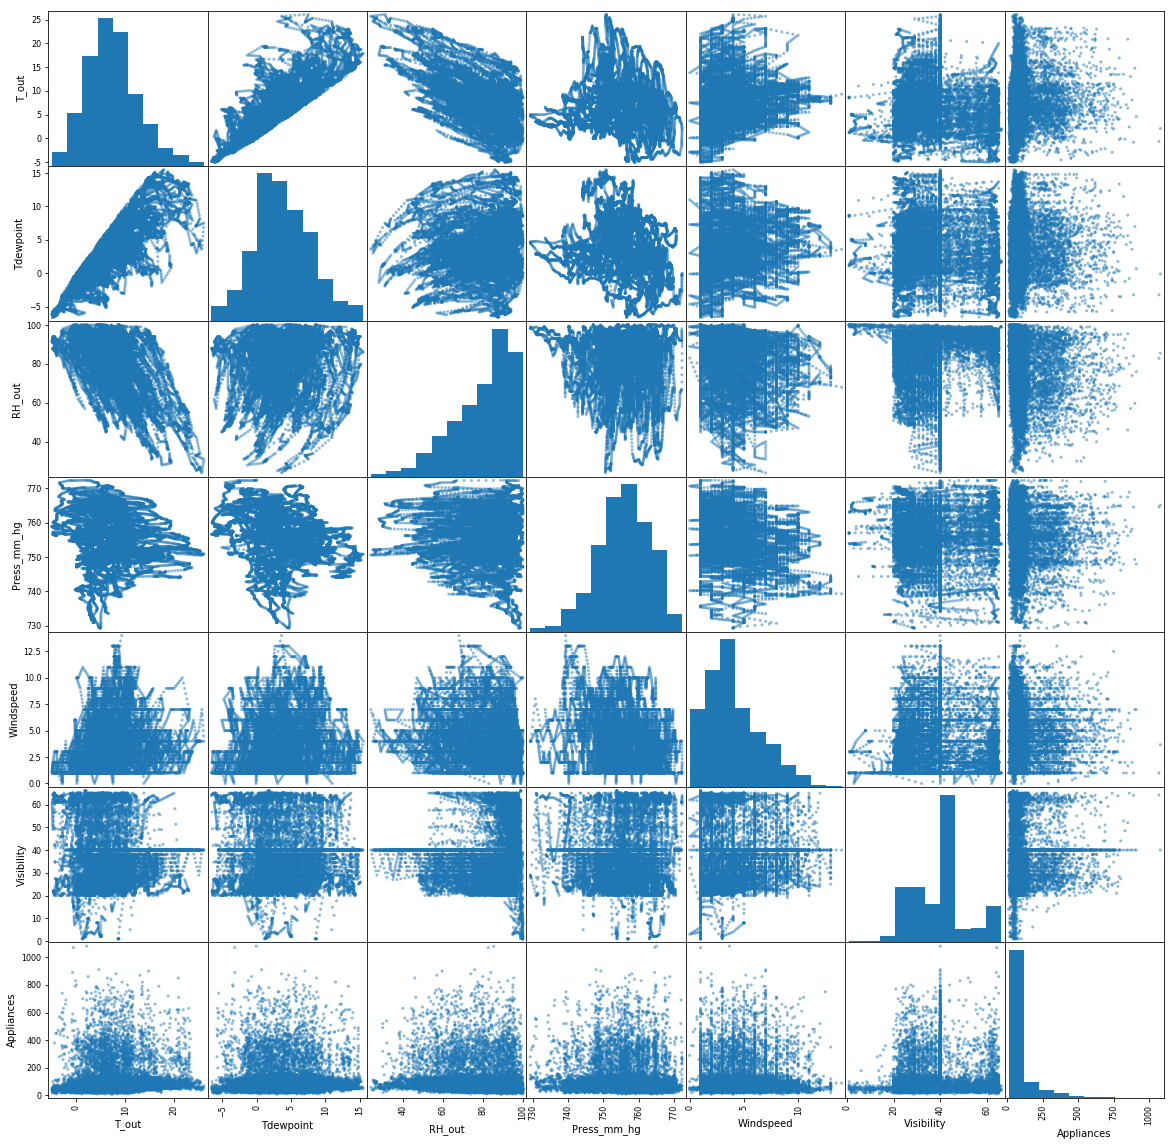

In [52]:
# scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(corr_wea, figsize=(20, 20))
pyplot.show()

#### Random Variables

In [53]:
corr_ran = dataset[column_randoms]

corr_ran.describe().T

count       mean        std       min        25%        50%        75%  \
rv1  19735.0  24.988033  14.496634  0.005322  12.497889  24.897653  37.583769   
rv2  19735.0  24.988033  14.496634  0.005322  12.497889  24.897653  37.583769   

          max  
rv1  49.99653  
rv2  49.99653

In [54]:
# Pearson correlation table
pearson_corr_ran = corr_ran.corr(method='pearson')
pearson_corr_ran

rv1  rv2
rv1  1.0  1.0
rv2  1.0  1.0

In [55]:
# Skewness
corr_ran.skew()

rv1    0.004945
rv2    0.004945
dtype: float64

In [56]:
# Kurtosis
corr_ran.kurtosis()

rv1   -1.205697
rv2   -1.205697
dtype: float64

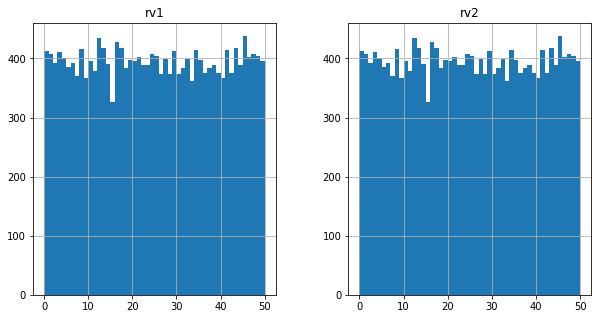

In [57]:
# Data distribution
corr_ran.hist(bins=50, figsize=(10,5))
plt.show()

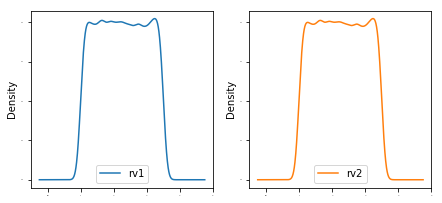

In [58]:
# density plot
corr_ran.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1, figsize=(15,15))
pyplot.show()

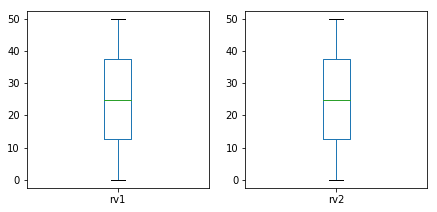

In [59]:
# box and whisker plots

corr_ran.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 15))
pyplot.show()

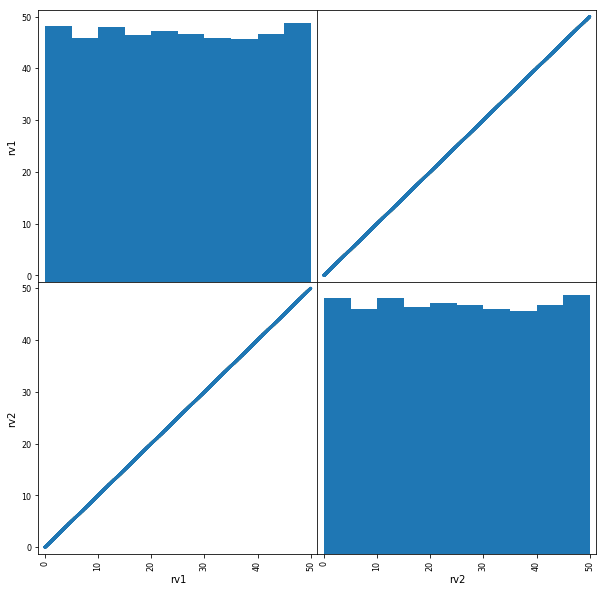

In [60]:
# scatter plot matrix

from pandas.plotting import scatter_matrix
scatter_matrix(corr_ran, figsize=(10, 10))
pyplot.show()

## Drop `date` and `light` column from the dataset

In [61]:
dataset.drop(['date', 'lights'], axis=1, inplace=True)
dataset.head(10)

Appliances         T1       RH_1     T2       RH_2     T3       RH_3  \
0          60  19.890000  47.596667  19.20  44.790000  19.79  44.730000   
1          60  19.890000  46.693333  19.20  44.722500  19.79  44.790000   
2          50  19.890000  46.300000  19.20  44.626667  19.79  44.933333   
3          50  19.890000  46.066667  19.20  44.590000  19.79  45.000000   
4          60  19.890000  46.333333  19.20  44.530000  19.79  45.000000   
5          50  19.890000  46.026667  19.20  44.500000  19.79  44.933333   
6          60  19.890000  45.766667  19.20  44.500000  19.79  44.900000   
7          60  19.856667  45.560000  19.20  44.500000  19.73  44.900000   
8          60  19.790000  45.597500  19.20  44.433333  19.73  44.790000   
9          70  19.856667  46.090000  19.23  44.400000  19.79  44.863333   

          T4       RH_4         T5  ...         T9   RH_9     T_out  \
0  19.000000  45.566667  17.166667  ...  17.033333  45.53  6.600000   
1  19.000000  45.992500  17.166667  ...  17.066667  45.56  6.483333   
2  18.926667  45.890000  17.166667  ...  17.000000  45.50  6.366667   
3  18.890000  45.723333  17.166667  ...  17.000000  45.40  6.250000   
4  18.890000  45.530000  17.200000  ...  17.000000  45.40  6.133333   
5  18.890000  45.730000  17.133333  ...  17.000000  45.29  6.016667   
6  18.890000  45.790000  17.100000  ...  17.000000  45.29  5.900000   
7  18.890000  45.863333  17.100000  ...  17.000000  45.29  5.916667   
8  18.890000  45.790000  17.166667  ...  17.000000  45.29  5.933333   
9  18.890000  46.096667  17.100000  ...  17.000000  45.29  5.950000   

   Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0   733.500000  92.000000   7.000000   63.000000   5.300000  13.275433   
1   733.600000  92.000000   6.666667   59.166667   5.200000  18.606195   
2   733.700000  92.000000   6.333333   55.333333   5.100000  28.642668   
3   733.800000  92.000000   6.000000   51.500000   5.000000  45.410389   
4   733.900000  92.000000   5.666667   47.666667   4.900000  10.084097   
5   734.000000  92.000000   5.333333   43.833333   4.800000  44.919484   
6   734.100000  92.000000   5.000000   40.000000   4.700000  47.233763   
7   734.166667  91.833333   5.166667   40.000000   4.683333  33.039890   
8   734.233333  91.666667   5.333333   40.000000   4.666667  31.455702   
9   734.300000  91.500000   5.500000   40.000000   4.650000   3.089314   

         rv2  
0  13.275433  
1  18.606195  
2  28.642668  
3  45.410389  
4  10.084097  
5  44.919484  
6  47.233763  
7  33.039890  
8  31.455702  
9   3.089314  

[10 rows x 27 columns]

## Data Normalization and Modelling

In [62]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxscaler
scaler = MinMaxScaler()


normalised_dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)

features = normalised_dataset.drop("Appliances", axis=1) # drop labels for training set
target = normalised_dataset['Appliances'].copy()

# Question 12

From the `dataset`, fit a `linear model` on the relationship between the `temperature in the living room in Celsius (x = T2)` and the `temperature outside the building (y = T6)`. What is the `R^2 value in two Decimal Places`?

In [63]:
normalised_dataset.head()

Appliances       T1      RH_1        T2      RH_2        T3      RH_3  \
0    0.046729  0.32735  0.566187  0.225345  0.684038  0.215188  0.746066   
1    0.046729  0.32735  0.541326  0.225345  0.682140  0.215188  0.748871   
2    0.037383  0.32735  0.530502  0.225345  0.679445  0.215188  0.755569   
3    0.037383  0.32735  0.524080  0.225345  0.678414  0.215188  0.758685   
4    0.046729  0.32735  0.531419  0.225345  0.676727  0.215188  0.758685   

         T4      RH_4        T5  ...        T9      RH_9     T_out  \
0  0.351351  0.764262  0.175506  ...  0.223032  0.677290  0.372990   
1  0.351351  0.782437  0.175506  ...  0.226500  0.678532  0.369239   
2  0.344745  0.778062  0.175506  ...  0.219563  0.676049  0.365488   
3  0.341441  0.770949  0.175506  ...  0.219563  0.671909  0.361736   
4  0.341441  0.762697  0.178691  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0     0.097674  0.894737   0.500000    0.953846   0.538462  0.265449  0.265449  
1     0.100000  0.894737   0.476190    0.894872   0.533937  0.372083  0.372083  
2     0.102326  0.894737   0.452381    0.835897   0.529412  0.572848  0.572848  
3     0.104651  0.894737   0.428571    0.776923   0.524887  0.908261  0.908261  
4     0.106977  0.894737   0.404762    0.717949   0.520362  0.201611  0.201611  

[5 rows x 27 columns]

In [68]:
#defining new predictor and response variable
x = normalised_dataset[['T2']]
y = normalised_dataset['T6']

#split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Instantiate the linear model
from sklearn.linear_model import  LinearRegression
simple_linear_reg_model = LinearRegression()

# fit to the training data
simple_linear_reg_model.fit(X_train, y_train)

# make predictions on the test data
y_pred_value = simple_linear_reg_model.predict(X_test)

In [69]:
# import the evaluation metrics
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# calculate the R^2 value
print('R^2 value in two(2) decimal places: ', round(r2_score(y_val, y_pred_value), 2))

R^2 value in two(2) decimal places:  0.64


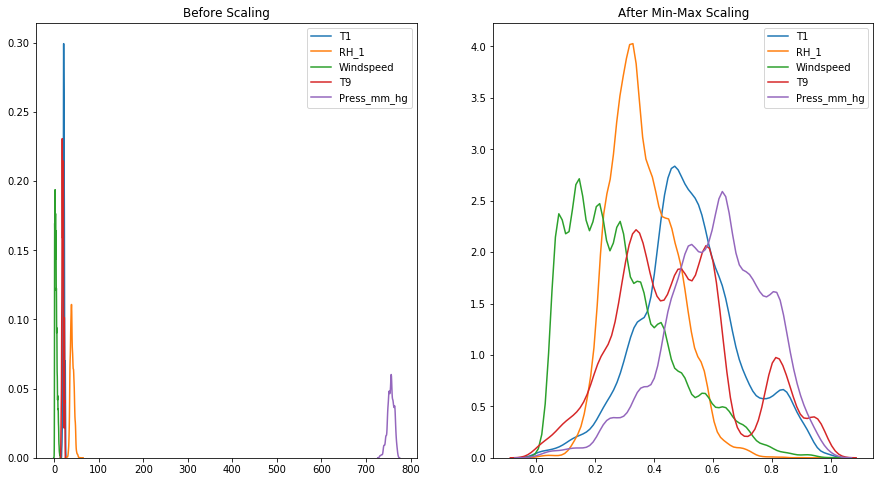

In [70]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(dataset['T1'], ax=ax1)
sns.kdeplot(dataset['RH_1'], ax=ax1)
sns.kdeplot(dataset['Windspeed'], ax=ax1)
sns.kdeplot(dataset['T9'], ax=ax1)
sns.kdeplot(dataset['Press_mm_hg'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(normalised_dataset['T1'], ax=ax2)
sns.kdeplot(normalised_dataset['RH_1'], ax=ax2)
sns.kdeplot(normalised_dataset['Windspeed'], ax=ax2)
sns.kdeplot(normalised_dataset['T9'], ax=ax2)
sns.kdeplot(normalised_dataset['Press_mm_hg'], ax=ax2)
plt.show()

In [72]:
# Now, we split our dataset into the training and testing dataset. 
# Recall that we had earlier segmented the features and target variables.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [73]:
x_train.shape, y_train.shape

((13814, 26), (13814,))

In [74]:
x_test.shape , y_test.shape

((5921, 26), (5921,))

In [75]:
x_train = pd.DataFrame(x_train, columns=x_train.columns)
x_test = pd.DataFrame(x_test, columns=x_test.columns)

### Linear Model (Linear Regression)

In [76]:
from sklearn.linear_model import  LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
linear_y_pred = linear_model.predict(x_test)

Text(0, 0.5, 'Predicted Values')

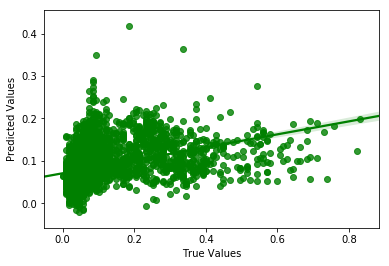

In [77]:
# Plot outputs
sns.regplot(x = y_test, y = linear_y_pred, color='green')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

### Evaluation Metrics for performance (RSS, R-Squared, RMSE, MAE etc)

How well a regression model performs can be obtained by how close the `predicted value` is to the `ground truth`. It is very important to use the appropriate `metric` to evaluate the performance. Some examples of metrics used in evaluating regression models such as `RSS`, `R-Squared`, `RMSE` and `MAE`.

- `Mean Absolute Error (MAE)`

`MAE`  is easy and intuitive such that it calculates the `sum of the  average of the absolute error` between the `predicted values` and the `true values`. Since the absolute difference is taken, this metric does not consider direction. However, because the absolute difference is obtained, it is unable to give information about the model `overshooting` or `undershooting`. The `smaller` the `MAE` is, the `better the model`. Therefore, if the `MAE is 0`, the `model is perfect` and accurately predicts results which is almost impossible.  The mean absolute error is more robust to outliers

# Question 13

What is the `Mean Absolute Error` (in two decimal places)?

In [126]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, linear_y_pred)
print('Mean absolute error in two decimal places: ', round(mae, 2))   # 3 decimal places

Mean absolute error in two decimal places:  0.05


- `Residual Sum of Squares (RSS)`

Also known as the `sum of squared residuals (SSR)`, this metric explains the variance in the representation of the dataset by the model; it measures how well the model approximates the data. A `residual` is the `estimated error` made by a model. In simpler terms, it is the difference between the `nth true value` and the `nth predicted value by the model`. `RSS` is the sum of the square of errors between the residuals in a model. The lower the RSS, the better the model’s estimations and vice versa.

# Question 14

What is the `Residual Sum of Squares` (in two decimal places)?

In [79]:
# Residual Sum of Squares
rss = np.sum(np.square(y_test - linear_y_pred))
print('Residual sum of squares in two decimal places: ', round(rss, 2))    # 2 decimal places

Residual sum of squares in two decimal places:  45.35


- `Mean Squared Error`

The `mean squared error` or `mean squared deviation` of an estimator measures the `average of the squares of the errors`, that is, the `average squared` difference between the `estimated values` and the `actual value`. 

In [80]:
# Mean Squared Error
mse = (mean_squared_error(y_test, linear_y_pred))
round(mse, 3)   # 3 decimal places

0.008

- `Root Mean Square Error (RMSE)`

This is the same as the `mean square error (MSE)` but, it is the `square root `of the `MSE` that estimates the `standard deviation` of the `residuals`. It describes the spread of the residuals from the line of best fit and the noise in the model. When the `RMSE is low`, it means that the `error` made by the model has a `small deviation` from the true values. It is calculated by summing the squares of the residuals and dividing by the number of observations.

# Question 15

What is the `Root Mean Squared Error` (in three decimal places)?

In [81]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
print('Root Mean Squared Error in three decimal(3) places : ', round(rmse, 3))   # 3 decimal places

Root Mean Squared Error in three decimal(3) places :  0.088


- `R-Squared` 

Also known as the `coefficient of determination`, `r-squared` is a metric used in regression to determine the `goodness of fit` of the model. With values ranging from `0 to 1`, It gives information on the percentage of the response variable  explained by the model. Mostly, the `higher the value`, the better the model however, this is not necessarily always true.

# Question 16


What is the `Coefficient of Determination` (in two decimal places)?

In [82]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, linear_y_pred)
print('Coefficient of Determination in two(2) decimal places: ', round(r2_score, 2))  # 2 decimal places

Coefficient of Determination in two(2) decimal places:  0.15


In [83]:
def plot_learning_curves(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 

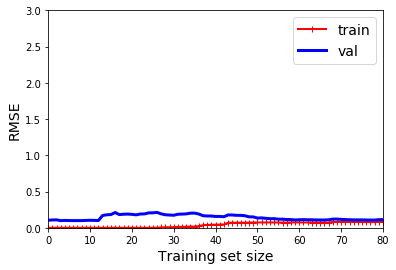

In [84]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, features, target)
plt.axis([0, 80, 0, 3])                         
# save_fig("underfitting_learning_curves_plot")   
plt.show() 

## `Penalization Methods`

- `Regulating over- and under-fitting`

`Regularization` is a method used to make `complex models` simpler by penalising coefficients to reduce their magnitude, variance in the training set and in turn, reduce overfitting in the model. `Regularization` occurs by `shrinking the coefficients` in the model towards zero such that the `complexity term` added to the model will result in a bigger loss for models with a higher complexity . There are two types of regression techniques such as `Ridge and Lasso regression`.

- `Ridge Regression`

Also known as `L2 Regularisation`, this is a technique that uses a `penalty term to shrink the magnitude of coefficients` towards zero without eliminating them. The shrinkage prevents overfitting caused by the `complexity` of the model or  `collinearity`. It includes the `square magnitude` of the coefficients to the `loss function` as the penalty term.  If the error is defined as the square of residual, when a L2 regularization term is added, the  result is the equation below.


As `lambda increases`, the penalty increases causing more coefficients to shrink in the same vein, if `lambda is zero`, it results in the `loss function`.

In [85]:
# import the Ridge Model
from sklearn.linear_model import Ridge

# Instantiate the estimator
ridge_reg = Ridge(alpha=0.4, random_state=0)

# fit on the training set  
ridge_reg.fit(x_train, y_train)

# make prediction on the test set
ridge_y_pred = ridge_reg.predict(x_test)

# Weight vector(s)
print("The weight vector of the ridge regression model: ", ridge_reg.coef_)

# intercept (Independent term in decision function)
print("The independent term (intercept) in decision function is : ", ridge_reg.intercept_)

The weight vector of the ridge regression model:  [-0.01840621  0.5195253  -0.20139673 -0.41107123  0.28808681  0.0951346
  0.02738389  0.02457853 -0.01985322  0.01615237  0.21729178  0.03551862
  0.01009781 -0.04597696  0.10102815 -0.15683005 -0.1889163  -0.04136654
 -0.26217227  0.00658387 -0.05472365  0.03026762  0.01207649  0.08312757
  0.00074817  0.00074817]
The independent term (intercept) in decision function is :  0.1275582694705889


In [88]:
for name, coef in zip(x_train, ridge_reg.coef_):
    print(name, "======", coef)

T1 ====== -0.01840620848762746
RH_1 ====== 0.5195252974886239
T2 ====== -0.20139672738965003
RH_2 ====== -0.41107122926152595
T3 ====== 0.2880868053491298
RH_3 ====== 0.09513459868438853
T4 ====== 0.027383888131486078
RH_4 ====== 0.024578530688567735
T5 ====== -0.019853223195813872
RH_5 ====== 0.016152365226084944
T6 ====== 0.2172917811180533
RH_6 ====== 0.03551862148328353
T7 ====== 0.010097813983434265
RH_7 ====== -0.045976959033224574
T8 ====== 0.1010281479520264
RH_8 ====== -0.156830051046648
T9 ====== -0.18891629657136
RH_9 ====== -0.041366538444921545
T_out ====== -0.26217226995708304
Press_mm_hg ====== 0.006583874542406997
RH_out ====== -0.05472364928424266
Windspeed ====== 0.03026761624318731
Visibility ====== 0.012076490379360882
Tdewpoint ====== 0.08312757442036843
rv1 ====== 0.0007481672740381667
rv2 ====== 0.000748167274041873


In [89]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, ridge_y_pred)
round(mae, 3)   # 3 decimal places

0.05

In [90]:
# Residual Sum of Squares
rss = np.sum(np.square(y_test - ridge_y_pred))
round(rss, 2)  # 2 decimal places 

45.37

In [91]:
# Mean Squared Error
mse = (mean_squared_error(y_test, ridge_y_pred))
round(mse, 3) # 3 decimal places

0.008

# Question 18

Train a `ridge regression model` with an `alpha` value of `0.4`. Is there any change to the `root mean squared error (RMSE)` when evaluated on the `test set`?

In [92]:
from sklearn.metrics import  mean_squared_error

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
round(rmse, 3)   # 3 decimal places

0.088

In [93]:
from sklearn.metrics import r2_score

# R2 score (Coefficient of determination)
r2_score = r2_score(y_test, ridge_y_pred)
round(r2_score, 2) # 2 decimal places 

0.15

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:

$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$

In [94]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [95]:
# Instantiate the estimator
lasso = Lasso(alpha=0.001, random_state=0)       

# Fit to the training dataset
lasso.fit(x_train, y_train)

# predict on the test set
lasso_y_pred = lasso.predict(x_test)

# Weight vector(s)
print("The weight vector of the ridge regression model: ", lasso.coef_)

# intercept (Independent term in decision function)
print("The independent term (intercept) in decision function is : ", lasso.intercept_)

The weight vector of the ridge regression model:  [ 0.          0.01787993  0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.00011004 -0.         -0.
  0.         -0.         -0.04955749  0.00291176  0.          0.
 -0.         -0.        ]
The independent term (intercept) in decision function is :  0.1110837766128246


In [96]:
for name, coef in zip(x_train, lasso.coef_):
    print(name, "=========", coef)

T1 ========= 0.0
RH_1 ========= 0.017879931671712427
T2 ========= 0.0
RH_2 ========= -0.0
T3 ========= 0.0
RH_3 ========= 0.0
T4 ========= -0.0
RH_4 ========= 0.0
T5 ========= -0.0
RH_5 ========= 0.0
T6 ========= 0.0
RH_6 ========= -0.0
T7 ========= -0.0
RH_7 ========= -0.0
T8 ========= 0.0
RH_8 ========= -0.00011003649473685543
T9 ========= -0.0
RH_9 ========= -0.0
T_out ========= 0.0
Press_mm_hg ========= -0.0
RH_out ========= -0.04955749437854848
Windspeed ========= 0.0029117647911781727
Visibility ========= 0.0
Tdewpoint ========= 0.0
rv1 ========= -0.0
rv2 ========= -0.0


In [97]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, lasso_y_pred)
round(mae, 3)   # 3 decimal places

0.055

In [98]:
# Residual Sum of Squares
rss = np.sum(np.square(y_test - lasso_y_pred))
round(rss, 2)  # 2 decimal places

51.85

In [99]:
# Mean Squared Error
mse = (mean_squared_error(y_test, lasso_y_pred))
round(mse, 3)  # 3 decimal places

0.009

# Question 20

What is the new `RMSE` with the `Lasso Regression` (in 3 decimal places)?

In [100]:
from sklearn.metrics import  mean_squared_error

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
round(rmse, 3)  # 3 decimal places

0.094

In [101]:
from sklearn.metrics import r2_score

# R2 score (Coefficient of determination)
r2_score = r2_score(y_test, lasso_y_pred)
round(r2_score, 3) # 2 decimal places

0.027

### Random Forests

`Random Forest` is an ensemble of `Decision Trees`, generally trained via the `bagging method` (or sometimes pasting), typically with `max_samples` set to the size of the training set. A random forest is a `meta estimator` that fits a number of classifying `decision trees` on various sub-samples of the dataset and uses averaging to improve the `predictive accuracy` and control `over-fitting`.

In [102]:
# Instantiate the meta estimator
regr_rf = RandomForestRegressor(max_features='auto', max_depth=2, random_state=0)

# Fit to the training dataset
regr_rf.fit(x_train, y_train)

# predict on the test set
regr_y_pred = regr_rf.predict(x_test)

In [103]:
for name, importance_score in zip(x_train, regr_rf.feature_importances_):
    print(name, "====", importance_score)

T1 ==== 0.0
RH_1 ==== 0.26351946734763404
T2 ==== 0.02704143655052964
RH_2 ==== 0.032100984695598245
T3 ==== 0.034365505928194415
RH_3 ==== 0.022260174299696622
T4 ==== 0.0
RH_4 ==== 0.0037041827573586227
T5 ==== 0.0
RH_5 ==== 0.05770819324907622
T6 ==== 0.0
RH_6 ==== 0.0029511197254699566
T7 ==== 0.0018178569536070955
RH_7 ==== 0.0020417529193617404
T8 ==== 0.0
RH_8 ==== 0.005143881090627487
T9 ==== 0.007823036420377398
RH_9 ==== 0.004461708538922403
T_out ==== 0.007233276719834811
Press_mm_hg ==== 0.010653350308458171
RH_out ==== 0.5123220702565603
Windspeed ==== 0.004852002238692794
Visibility ==== 0.0
Tdewpoint ==== 0.0
rv1 ==== 0.0
rv2 ==== 0.0


In [104]:
regr_rf.feature_importances_

array([0.        , 0.26351947, 0.02704144, 0.03210098, 0.03436551,
       0.02226017, 0.        , 0.00370418, 0.        , 0.05770819,
       0.        , 0.00295112, 0.00181786, 0.00204175, 0.        ,
       0.00514388, 0.00782304, 0.00446171, 0.00723328, 0.01065335,
       0.51232207, 0.004852  , 0.        , 0.        , 0.        ,
       0.        ])

In [105]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(regr_rf.feature_importances_)

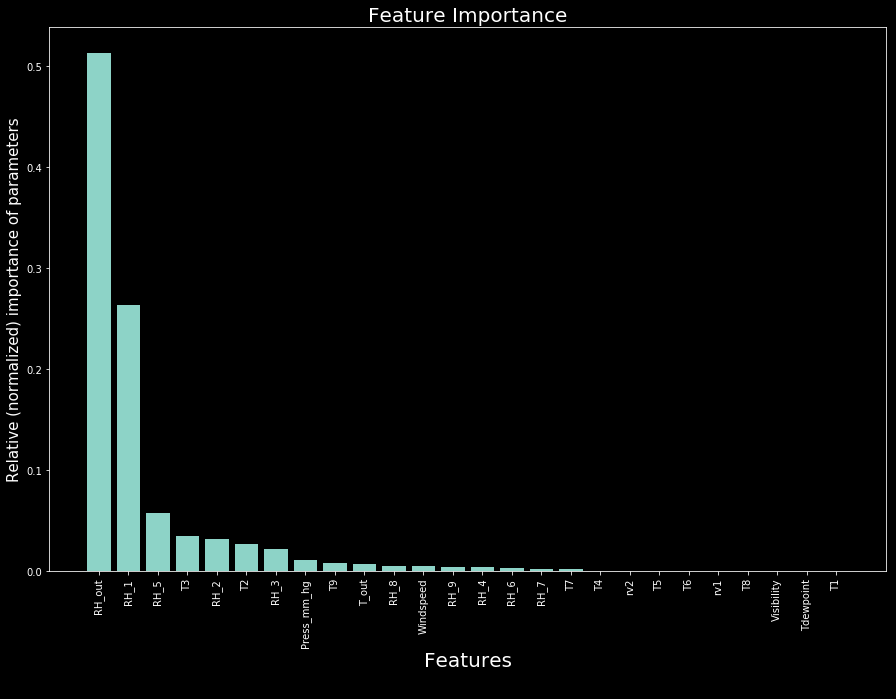

In [106]:
feature_importances = regr_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [x_train.columns[i] for i in indices]

with plt.style.context('dark_background'):
    # Create plot
    plt.figure(figsize=(15, 10))

    # Create plot title
    plt.title("Feature Importance", fontsize=20)

    # Add bars
    plt.bar(range(x_train.shape[1]), feature_importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(x_train.shape[1]), names, rotation=90)
    
    plt.ylabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.xlabel("Features\n",fontsize=20)

    # Show plot
    plt.show()

In [107]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, regr_y_pred)
round(mae, 3)  # 3 decimal places

0.054

In [108]:
# Residual Sum of Squares
rss = np.sum(np.square(y_test - regr_y_pred))
round(rss, 2)  # 2 decimal places

50.8

In [109]:
# Mean Squared Error
mse = (mean_squared_error(y_test, regr_y_pred))
round(mse, 3)  # 3 decimal places

0.009

In [110]:
from sklearn.metrics import  mean_squared_error

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, regr_y_pred))
round(rmse, 3)   # 3 decimal places

0.093

In [111]:
from sklearn.metrics import r2_score

# R2 score (Coefficient of determination)
r2_score = r2_score(y_test, regr_y_pred)
round(r2_score, 2)  # 2 decimal places

0.05

### Elastic Net  

- `Linear regression with combined L1 and L2 priors as regularizer`. `Elastic net` is a regularized regression method that linearly combines the `L1` and `L2` penalties of the `lasso` and `ridge` methods. 

In [112]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Instantiate the estimator
elastic_regr = ElasticNet(random_state=0)

search = GridSearchCV(estimator=elastic_regr, 
                      param_grid={'alpha':np.logspace(-5,2,8),
                                  'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error',
                      n_jobs=1,
                      refit=True,
                      cv=10)

In [113]:
search.fit(x_train, y_train)
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.2}

In [114]:
abs(search.best_score_)

0.007956101506991263

The best hyperparameters was an `alpha` set to `1e-05` and a `l1_ratio` of `0.2`. we will set our hyperparameters to the recommended values and run on the data.

In [115]:
elastic = ElasticNet(alpha=1e-05, l1_ratio=0.2)

# Fit to training data
elastic.fit(x_train, y_train)

# Make predictions on the test data
elastic_y_pred = elastic.predict(x_test)

In [116]:
coef_dict = {}

for coef, feat in zip(elastic.coef_, x_train.columns):
    coef_dict[feat] = coef
    
coef_dict

{'T1': -0.009076232680752711,
 'RH_1': 0.5402139115130822,
 'T2': -0.21946615785748935,
 'RH_2': -0.4351139084071007,
 'T3': 0.28843781693439385,
 'RH_3': 0.09463997672031874,
 'T4': 0.027203655059228796,
 'RH_4': 0.024287362321198765,
 'T5': -0.017614731597218956,
 'RH_5': 0.01600310416686105,
 'T6': 0.22502577203401397,
 'RH_6': 0.03606502334030644,
 'T7': 0.00889810674916891,
 'RH_7': -0.04432246814538937,
 'T8': 0.10124206616125205,
 'RH_8': -0.15752731481888188,
 'T9': -0.1882572042325145,
 'RH_9': -0.039999898235436655,
 'T_out': -0.28048514298812954,
 'Press_mm_hg': 0.006696377055570861,
 'RH_out': -0.0605856823492809,
 'Windspeed': 0.029838507510679176,
 'Visibility': 0.012059280035635873,
 'Tdewpoint': 0.09262171902729169,
 'rv1': 0.0013883710206271185,
 'rv2': 0.00010539528537198329}

In [117]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, elastic_y_pred)
round(mae, 3)  # 3 decimal places

0.05

In [118]:
# Residual Sum of Squares
rss = np.sum(np.square(y_test - elastic_y_pred))
round(rss, 2)  # 2 decimal places

45.35

In [119]:
# Mean Squared Error
mse = (mean_squared_error(y_test, elastic_y_pred))
round(mse, 3)  # 3 decimal places

0.008

In [120]:
from sklearn.metrics import  mean_squared_error

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, elastic_y_pred))
round(rmse, 3)   # 3 decimal places

0.088

In [121]:
from sklearn.metrics import r2_score

# R2 score (Coefficient of determination)
r2_score = r2_score(y_test, elastic_y_pred)
round(r2_score, 2) # 2 decimal places

0.15

In [122]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso, x_train, 'Lasso_weight')
elastic_net_weights_df = get_weights_df(elastic, x_train, 'Elastic_Net_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights = pd.merge(final_weights, elastic_net_weights_df, on='Features')

In [123]:
final_weights

Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight  \
0           rv2        -6.347156e+10      0.000748     -0.000000   
1          RH_2        -4.566222e-01     -0.411071     -0.000000   
2         T_out        -3.218423e-01     -0.262172      0.000000   
3            T2        -2.361131e-01     -0.201397      0.000000   
4            T9        -1.899177e-01     -0.188916     -0.000000   
5          RH_8        -1.575747e-01     -0.156830     -0.000110   
6        RH_out        -7.767868e-02     -0.054724     -0.049557   
7          RH_7        -4.462568e-02     -0.045977     -0.000000   
8          RH_9        -3.980029e-02     -0.041367     -0.000000   
9            T5        -1.566246e-02     -0.019853     -0.000000   
10           T1        -3.281051e-03     -0.018406      0.000000   
11  Press_mm_hg         6.826116e-03      0.006584     -0.000000   
12           T7         1.032279e-02      0.010098     -0.000000   
13   Visibility         1.230638e-02      0.012076      0.000000   
14         RH_5         1.599761e-02      0.016152      0.000000   
15         RH_4         2.638746e-02      0.024579      0.000000   
16           T4         2.897013e-02      0.027384     -0.000000   
17    Windspeed         2.916591e-02      0.030268      0.002912   
18         RH_6         3.803986e-02      0.035519     -0.000000   
19         RH_3         9.604517e-02      0.095135      0.000000   
20           T8         1.019718e-01      0.101028      0.000000   
21    Tdewpoint         1.177300e-01      0.083128      0.000000   
22           T6         2.363984e-01      0.217292      0.000000   
23           T3         2.905893e-01      0.288087      0.000000   
24         RH_1         5.535222e-01      0.519525      0.017880   
25          rv1         6.347156e+10      0.000748     -0.000000   

    Elastic_Net_weight  
0             0.000105  
1            -0.435114  
2            -0.280485  
3            -0.219466  
4            -0.188257  
5            -0.157527  
6            -0.060586  
7            -0.044322  
8            -0.040000  
9            -0.017615  
10           -0.009076  
11            0.006696  
12            0.008898  
13            0.012059  
14            0.016003  
15            0.024287  
16            0.027204  
17            0.029839  
18            0.036065  
19            0.094640  
20            0.101242  
21            0.092622  
22            0.225026  
23            0.288438  
24            0.540214  
25            0.001388

# Question 17

Obtain the feature weights from your `linear model` above. Which `features` have the `lowest` and `highest weights` respectively?

In [124]:
#lowest and highest weight for linear model
linear_model_weights = linear_model_weights.sort_values(by = 'Linear_Model_Weight')
print('Lowest weight for:', linear_model_weights.iloc[0])

print("===================================================")
print('Highest weight for:', linear_model_weights.iloc[-1])

Lowest weight for: Features                       rv2
Linear_Model_Weight   -6.34716e+10
Name: 0, dtype: object
Highest weight for: Features                       rv1
Linear_Model_Weight    6.34716e+10
Name: 25, dtype: object


# Question 19

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [125]:
#number of features having non-zero weights
len(lasso_weights_df[lasso_weights_df['Lasso_weight'] != 0])

4

# Summary

- `Question 12: ` The `R^2` value in two (2) decimal place is `0.64`.


- `Question 13: ` The `Mean absolute error` in two(2) decimal place is `0.05`.


- `Question 14: ` The `Residual Sum of Squares` in two(2) decimal place is `45.35`.


- `Question 15: ` The `Root Mean Squared Error` in three (3) decimal place is `0.088`.


- `Question 16: ` The `Coefficient of determination` in two(2) decimal place is `0.15`.


- `Question 17: ` The `Linear_Model_Weight` is `RH_2`, while the Highest_Model_weight is `RH_1`.


- `Question 18: ` There seems to be no significant change when the Root Mean Squared error was evaluated on the test set using `Ridge Regression` with `alpha` set to `0.4`.


- `Question 19: ` `4` Features have non-zero feature weights.


- `Question 20: ` The New `RMSE` with `Lasso Regression` in three(3) decimal places is `0.094` 